# Сборный проект №1

Проект посвящен анализу интернет-магазина «Стримчик» , который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Данные представлены до 2016 года.

**Цель проекта:** Выявить закономерности определяющие успешность игры.

**План проекта:**
1. [Провести предобработку данных](#scrollTo=dYoqsvs-bOOQ&line=1&uniqifier=1)
2. [Описать и визуализировать общую информацию о играх и платформах, провести исследовательский анализ данных](#scrollTo=lJXvw-z-bOOY)  
3. [Составить портрет пользователя каждого региона](#scrollTo=UPnO60t1bOOl)
4. [Проверить гипотезы](#scrollTo=8iU5Ke0xbOOn&line=1&uniqifier=1)
5. [Описать результаты](#scrollTo=2Ic4ZiswbOOp&line=1&uniqifier=1)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from scipy.stats import ttest_ind

##  Загрузка данных

In [2]:
df = pd.read_csv('/content/games (1).csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Описание данных для df**
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод:**

1. Названия столбцов имеют некорректный вид и требуют приведения к нижнему регистру.
2. В некоторых столбцах тип данных не соответствует содержанию. Необходимо изменить тип данных на int для столбцов Year_of_Release, Сritic_Score.
3. В столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score и Rating имеются пропуски, которые требуется обработать.
4. Возможно, присутствие дубликатов, которые необходимо проверить.

#### Подготовка данных

##### Замена названий столбцев

In [4]:
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


##### Обработка пропусков, где это возможно

**name**


Поскольку, заменить пропуски на названия игр не возможно, и пропусков совсем мало, удалим их.

In [5]:
df = df.dropna(subset=['name'])
print('Всего строк:', df.shape[0])
df.isna().sum()

Всего строк: 16713


,0
name,0
platform,0
year_of_release,269
genre,0
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
critic_score,8576
user_score,6699


**year_of_release**

Всего 269 пропусков, данные пропуски нет возможности обработать, поскольку потери не большие, стоит их удалить

In [6]:
df = df.dropna(subset=['year_of_release'])
print('Всего строк:', df.shape[0])
df.isna().sum()

Всего строк: 16444


,0
name,0
platform,0
year_of_release,0
genre,0
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
critic_score,8461
user_score,6605


Поскольку пропсков нет, можно изменить тип данных на int, по причине того, что года должны быть целым числом  

In [7]:
df['year_of_release'] = df['year_of_release'].astype('int')

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что перевели тип данных по году выпуска игр. 👍</font>

**critic_score**
Всего 8461 пропусков в данном столбце, возможно причина появления пропусков отсутствие оценки, заполним пропуски заглушкой - 101, что будет означать отсутствие оценки.

In [8]:
df['critic_score'] = df['critic_score'].fillna(101)
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,101.0,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,101.0,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


**user_score**

Поскольку тип данных в этом столбце является объектным (object), заменим все значения "TBD" на пропуски (NaN) и изменим тип данных на вещественный (float). Мы оставляем пропуски в столбце user_score, поскольку агрегирующие функции, которые часто используются в анализе данных, игнорируют пропуски. Аббревиатура TBD означает To Be Determined и используется для отметки неясностей или пропусков, которые необходимо заполнить.

In [10]:
df['user_score'] = df['user_score'].replace('tbd', np.nan).astype('float')
df['user_score'] = df['user_score'].fillna(11)
df_tbd = df[df['user_score']== 'tbd']
df_tbd

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


**rating** Поскольку содержание столбца составляют строки, изменим пропуски на нет оценки

In [11]:
df['rating'] = df['rating'].fillna('нет оценки')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [12]:
df.isna().sum()

,0
name,0
platform,0
year_of_release,0
genre,0
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
critic_score,0
user_score,0


In [13]:
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,101.0,11.0,нет оценки
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,101.0,11.0,нет оценки


**Вывод:**

Пропуски в данных были обработаны. В столбцах critic_score и user_score пропуски оставлены для сохранения точности исходных данных. Из-за наличия пропусков тип данных в столбце critic_score не может быть изменен. Однако, чтобы обеспечить анализ данных, были созданы дополнительные столбцы с категорией 'нет оценки' для обозначения отсутствия оценки и с оценками от 1 до 10 для столбцов с пропусками. Эти столбцы с категориями помогут учитывать данные при анализе, не искажая их основные характеристики и предоставляя более полную информацию о наличии или отсутствии оценок.


Пропуски в данных могли быть обусловлены различными факторами. Во-первых, они могли возникнуть из-за недостаточной известности игры или платформы, когда оценка игры не является обязательной. В таких случаях игра может остаться неоцененной как зрителями, так и критиками. Во-вторых, пропуски могли появиться из-за относительной новизны игровой индустрии. Так же в 1994 году, когда была основана  Interactive Digital Software Association (ныне известная как Entertainment Software Association) многие игры могли остаться без оценки по возрастному рейтингу из-за необходимости времени на его установление и стандартизацию.

##### Поиск и обработка дубликатов

In [14]:
def duplicates_df(df,name):
    duplicates = df[df.duplicated()]
    if not duplicates.empty:
        print(f'Обнаружены явные дубликаты для {name}:')
        print(duplicates)
    else:
        print(f"Явных дубликатов для {name} не обнаружено.")

In [15]:
print(duplicates_df(df,'df'))

Явных дубликатов для df не обнаружено.
None


In [16]:
unique_df = df.drop_duplicates(subset=['name', 'platform', 'year_of_release'])
duplicates = len(df) - len(unique_df)
if len(df) == len(unique_df):
    print(f'нет явных дубликатов, кол-во дубликатов: {duplicates}')
else:
    print(f'есть явные дубликаты, кол-во дубликатов: {duplicates}')

есть явные дубликаты, кол-во дубликатов: 1


In [17]:
df.drop_duplicates(subset=['name', 'platform', 'year_of_release'], inplace=True)

unique_df = df.drop_duplicates(subset=['name', 'platform', 'year_of_release'])
if len(df) == len(unique_df):
    print("Нет неявных дубликатов.")
else:
    print("В исходном датафрейме есть неявные дубликаты.")

Нет неявных дубликатов.


##### Сумарные продажи

In [18]:
df['total_sales'] = df.loc[:,['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,101.0,11.0,нет оценки,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,101.0,11.0,нет оценки,31.38


In [19]:
temp = df.copy()
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%')

<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  float64
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
name :

#### Исследовательский анализ данных

##### Количество выпущенных игр по годам

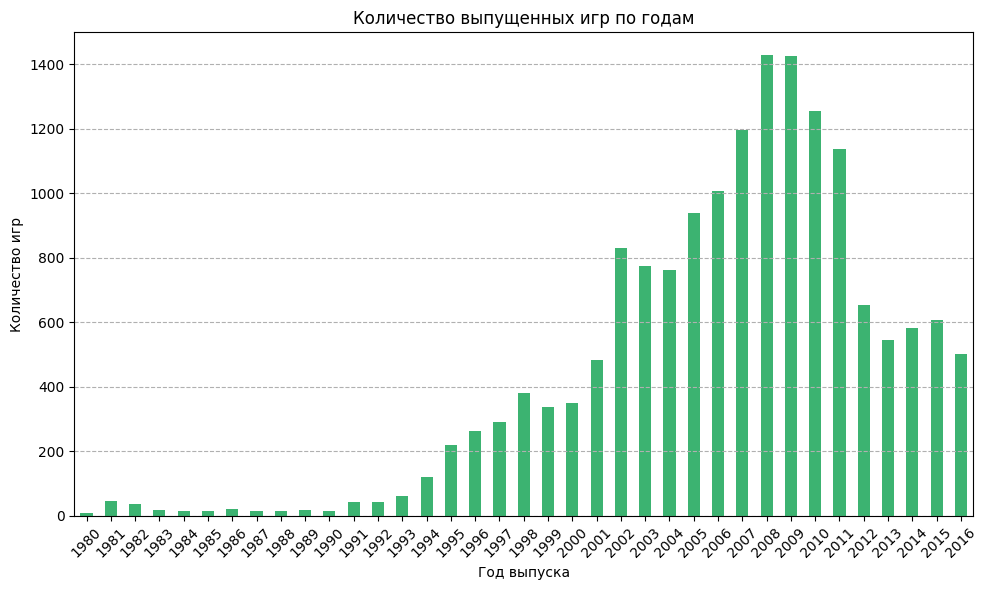

In [20]:
games_by_year = df['year_of_release'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
games_by_year.plot(kind='bar', color='#3CB371')
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=1)
plt.tight_layout()
plt.show()

**Вывод:**
    
Наибольшее количество игр было выпущено в 2008 и 2009 годах, после чего наблюдался спад с 2010 по 2013 год, возможно связанный с мировым экономическим кризисом. С 1980 по 1993 год количество выпущенных игр в год не превышало 50, что, вероятно, связано с молодостью игровой индустрии и ограниченными техническими возможностями того времени. Важно отметить, что информация за 2016 год считается не полной, что может влиять на общее представление о тенденциях в индустрии в последние годы.

##### Распределение продаж по годам для платформ с наибольшими суммарными продажами

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  float64
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


In [22]:
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print("Топ 10 платформ по продажам ")

platform_sales.head(10)

Топ 10 платформ по продажам 


,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


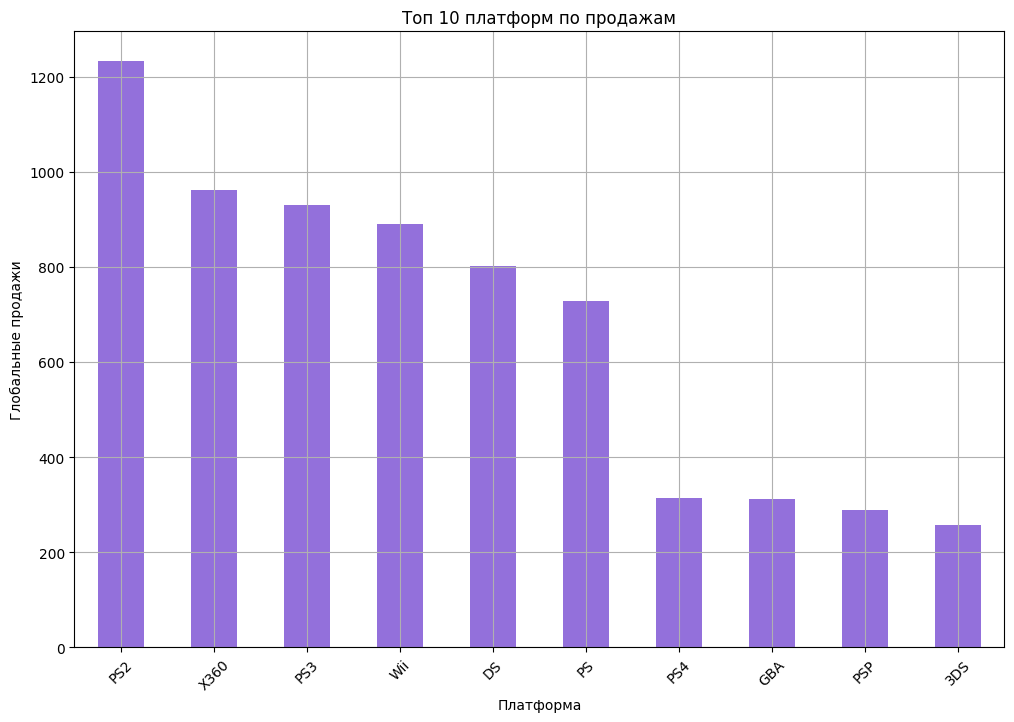

In [23]:
platform_sales.head(10).plot(kind='bar', figsize=(12, 8), color='#9370DB')
plt.title('Топ 10 платформ по продажам')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Вывод:**

Самые прибыльные платформы на период с 1980 года по 2016 это PS2, X360, Wii, PS3, DS. Где PS2 наиболее прибыльная.

In [24]:
top5_platforms = platform_sales.head(5).index.tolist()
df_top_platforms = df[df['platform'].isin(top5_platforms)]
df_top_platforms.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


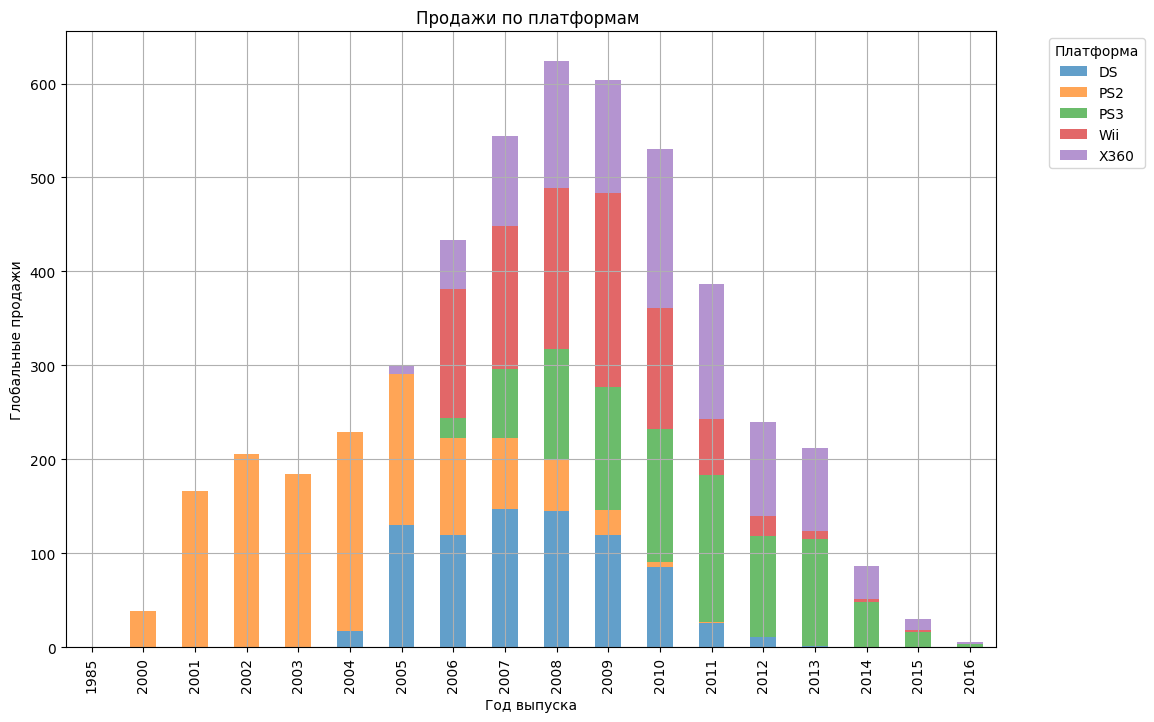

In [25]:
platform_sales_by_year = df_top_platforms.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()
plt.figure(figsize=(12, 8))
platform_sales_by_year.plot(kind='bar', stacked=True, alpha=0.7, ax=plt.gca())

plt.title('Продажи по платформам ')
plt.xlabel('Год выпуска')
plt.ylabel('Глобальные продажи')
plt.legend(title='Платформа', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

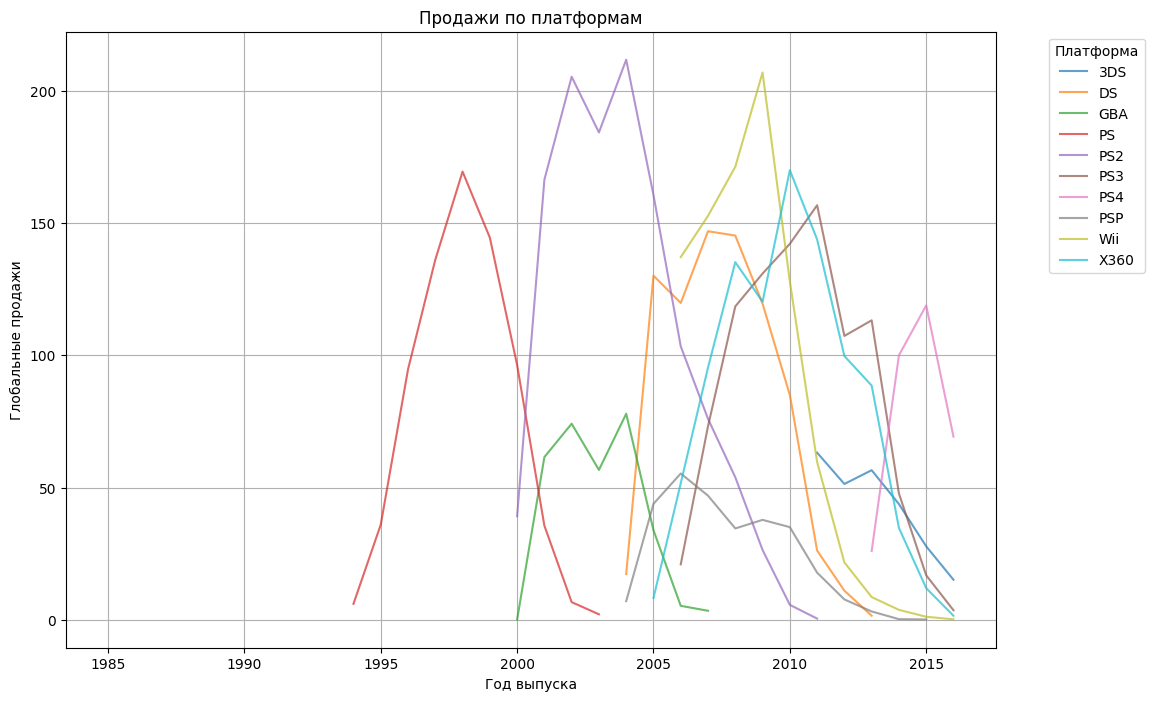

In [26]:
top10_platforms = platform_sales.head(10).index.tolist()
df_top10_platforms = df[df['platform'].isin(top10_platforms)]
platform_sales_by_year = df_top10_platforms.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

plt.figure(figsize=(12, 8))
platform_sales_by_year.plot(kind='line', alpha=0.7, ax=plt.gca())

plt.title('Продажи по платформам')
plt.xlabel('Год выпуска')
plt.ylabel('Глобальные продажи')
plt.legend(title='Платформа', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

**Вывод:**

Не смотря на то, что за весь период лидирует ps2 (а так же с 2000 по 2004) с годом выхода в 2000м году, x360 по продажам лидирует с 2005 до 2015,так же с года своего выхода (2005), на данном графике можно предположить, что Xbox 360 успешнее PlayStation 2 по ежегодной выручке за весь период. Имеется некоторый тренд для большинства платформ после запуска платформы идет резкий подъем а затем спад.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  float64
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


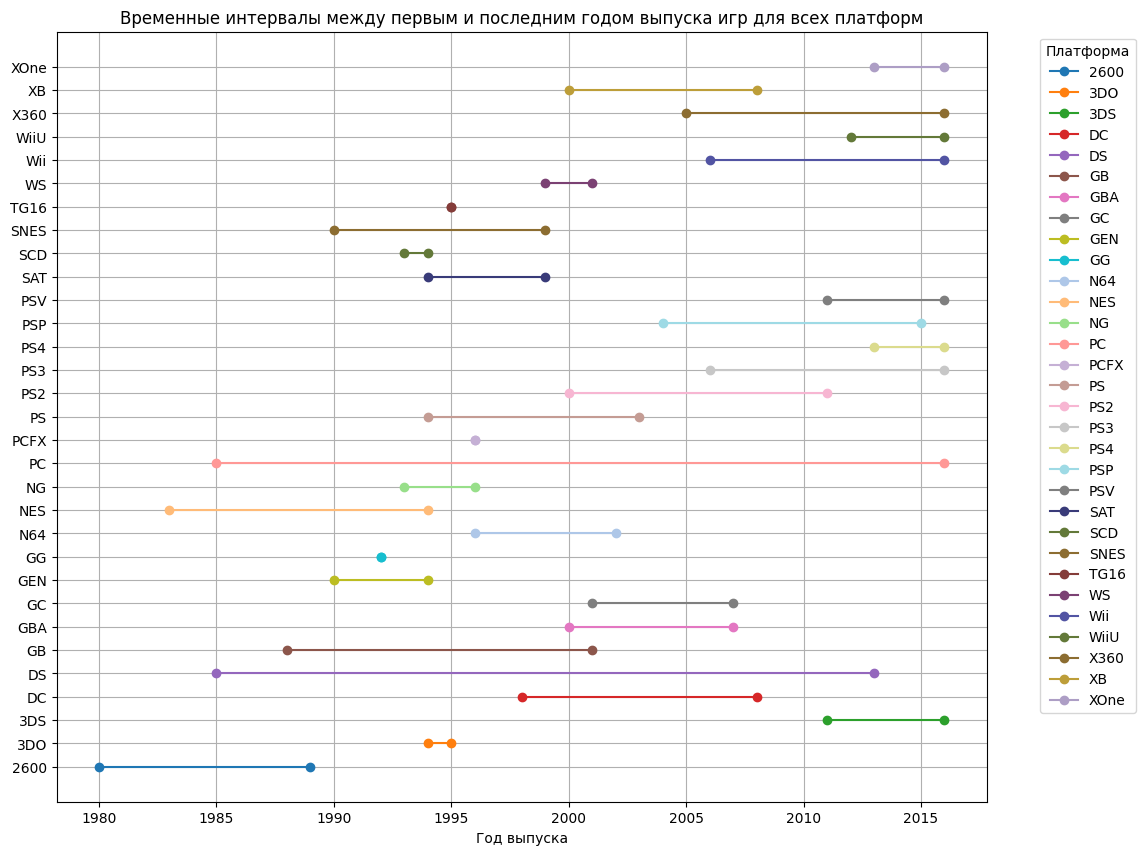

In [28]:
platform_first_year = df.groupby('platform')['year_of_release'].min()
platform_last_year = df.groupby('platform')['year_of_release'].max()

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
          "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
          "#aec7e8", "#ffbb78", "#98df8a", "#ff9896", "#c5b0d5",
          "#c49c94", "#f7b6d2", "#c7c7c7", "#dbdb8d", "#9edae5",
          "#7f7f7f", "#393b79", "#637939", "#8c6d31", "#843c39",
          "#7b4173", "#5254a3", "#637939", "#8c6d31", "#bd9e39",
          "#ad9ec5"]


platform_intervals = pd.DataFrame({'first_year': platform_first_year, 'last_year': platform_last_year})
plt.figure(figsize=(12, 10))
for i, platform in enumerate(platform_intervals.index):
    plt.plot([platform_intervals.loc[platform, 'first_year'], platform_intervals.loc[platform, 'last_year']],
             [i, i], marker='o', label=platform, color=colors[i])

plt.title('Временные интервалы между первым и последним годом выпуска игр для всех платформ')
plt.xlabel('Год выпуска')
plt.yticks(range(len(platform_intervals)), platform_intervals.index)
plt.grid(True)
plt.legend(title='Платформа',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

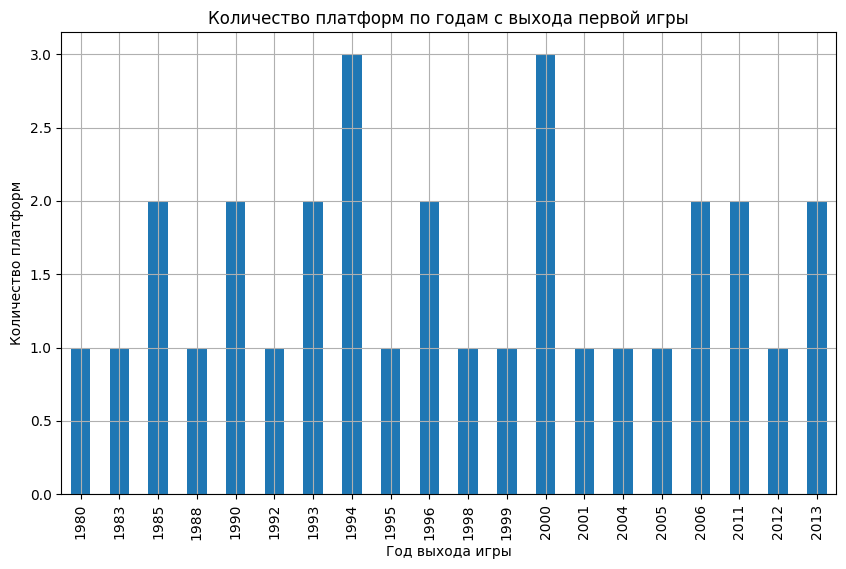

In [29]:
platforms_by_year = platform_first_year.value_counts().sort_index()

platforms_by_year.plot(kind='bar', figsize=(10, 6))
plt.title('Количество платформ по годам с выхода первой игры')
plt.xlabel('Год выхода игры')
plt.ylabel('Количество платформ')
plt.grid(True)
plt.show()

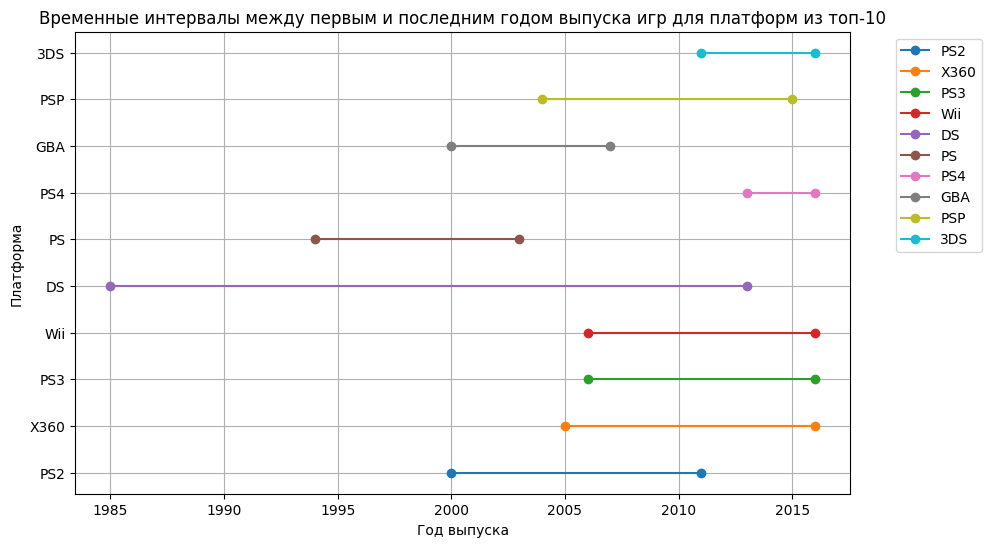

In [30]:
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_platforms = platform_sales.head(10).index.tolist()
df_top_platforms = df[df['platform'].isin(top_platforms)]

plt.figure(figsize=(10, 6))
for platform in top_platforms:
    platform_data = df_top_platforms[df_top_platforms['platform'] == platform]
    plt.plot([platform_data['year_of_release'].min(), platform_data['year_of_release'].max()],
             [platform, platform], marker='o', label=platform)

plt.title('Временные интервалы между первым и последним годом выпуска игр для платформ из топ-10')
plt.xlabel('Год выпуска')
plt.ylabel('Платформа')
plt.yticks(top_platforms)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Поскольку Nintendo DS вышло в 2004, данные за 1985 год, предположительно не корректны.

In [31]:
ds_sorted_by_year = df[df['platform'] == 'DS'].sort_values(by='year_of_release')
ds_sorted_by_year.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.00,0.00,0.02,0.0,101.0,11.0,нет оценки,0.02
13463,Cocoto Kart Racer,DS,2004,Racing,0.04,0.00,0.00,0.0,101.0,11.0,E,0.04
11517,Kenshuui Tendo Dokuta,DS,2004,Simulation,0.00,0.00,0.08,0.0,101.0,11.0,нет оценки,0.08
4421,The Urbz: Sims in the City (all regions sales),DS,2004,Simulation,0.40,0.01,0.02,0.0,101.0,11.0,нет оценки,0.43
7902,Daigasso! Band Brothers,DS,2004,Misc,0.00,0.00,0.19,0.0,101.0,11.0,нет оценки,0.19


В данных есть ошибка, как написано на сайте (https://gamefaqs.gamespot.com/ds/937837-saikyou-toudai-shogi-ds/data?validate=1) "Saikyou Toudai Shogi DS is a Miscellaneous game, developed and published by Mainichi Communications, which was released in Japan in 2007." Следовательно игра могла выйти в 2007, поскольку, я не могу на 100% быть уверена в этой информации, удалю данную строку.  

In [32]:
df.drop(15957, axis=0, inplace=True)
ds_sorted_by_year = df[df['platform'] == 'DS'].sort_values(by='year_of_release')
ds_sorted_by_year.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
4421,The Urbz: Sims in the City (all regions sales),DS,2004,Simulation,0.40,0.01,0.02,0.00,101.0,11.0,нет оценки,0.43
13095,Tennis no Oji-Sama: 2005 Crystal Drive,DS,2004,Sports,0.00,0.00,0.05,0.00,101.0,11.0,нет оценки,0.05
11517,Kenshuui Tendo Dokuta,DS,2004,Simulation,0.00,0.00,0.08,0.00,101.0,11.0,нет оценки,0.08
6580,Polarium,DS,2004,Puzzle,0.13,0.01,0.11,0.01,73.0,8.4,E,0.26
14161,Puyo Pop Fever(us sales),DS,2004,Puzzle,0.03,0.00,0.00,0.00,101.0,11.0,нет оценки,0.03


In [40]:
df_filtered_before_2000 = df[df['year_of_release'] < 2000]
df_filtered_after_2000 = df[df['year_of_release'] >= 2000]

def platform_lifetime_def(df, time):

    platform_first_year = df.groupby('platform')['year_of_release'].min()
    platform_last_year = df.groupby('platform')['year_of_release'].max()

    platform_lifetime = platform_last_year - platform_first_year + 1
    average_lifetime = platform_lifetime.median()
    print('Средний срок жизни платформы в период с', time, average_lifetime)

In [41]:
print(platform_lifetime_def(df,'1980 по 2016 = '))
print(platform_lifetime_def(df_filtered_before_2000, '1980 по 2000 = '))
print(platform_lifetime_def(df_filtered_after_2000, '2000 по 2016 = '))

Средний срок жизни платформы в период с 1980 по 2016 =  7.0
None
Средний срок жизни платформы в период с 1980 по 2000 =  4.0
None
Средний срок жизни платформы в период с 2000 по 2016 =  7.5
None


**Вывод:**
Средний срок 'жизни' платформы составляет 7.0 лет. Этот показатель объясняется как долгоживущими платформами, такими как DS или PC, так и короткоживущими платформами, которые не выдержали конкуренции или прекратили выпуск игр по другим причинам.
График количества платформ по годам показывает, что за один год обычно не появляется более трех новых платформ. Новая платформа появляется примерно каждые 2-3 года.
С 1990 по 2000 годы было выпущено больше всего платформ, проживших менее 4х лет. Однако с 2000 года 'жизнь' платформ значительно увеличилась по сравнению с периодом с 1985 по 2000 год.


##### Исследование данных за актуальный период
Из представленных данных возьмем период с 2013-2016 года и примем его как актуальный, поскольку они являются наиболее презентабильными и отражают представленные данные.

In [42]:
df_filtered = df[df['year_of_release'] >= 2013]
df_filtered.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,101.0,11.0,нет оценки,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,101.0,11.0,нет оценки,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


###### Лидирующие платформы
Как было уже упомянуто среднее значение продаж по платформам выше у PS4, построим график для лучшего представления этих данных и просмотрим суммарные значения продаж для каждой платформы за данный период.

In [44]:
df_filtered_platform = df_filtered.groupby('platform')['total_sales']
platform_stats = df_filtered_platform.describe().sort_values(by='count', ascending=False)
platform_stats

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.200,0.7300,14.63
PSV,358.0,0.092151,0.153816,0.01,0.0200,0.040,0.1100,1.96
PS3,345.0,0.525884,1.451939,0.01,0.0400,0.150,0.5100,21.05
3DS,303.0,0.472772,1.381347,0.01,0.0400,0.090,0.2800,14.60
XOne,247.0,0.645020,1.036139,0.01,0.0600,0.220,0.6850,7.39
PC,189.0,0.208624,0.352304,0.01,0.0300,0.080,0.2300,3.05
X360,186.0,0.735484,1.663275,0.01,0.0800,0.265,0.7950,16.27
WiiU,115.0,0.562000,1.038778,0.01,0.0600,0.200,0.5950,7.09
PSP,67.0,0.052239,0.059768,0.01,0.0150,0.020,0.0700,0.24


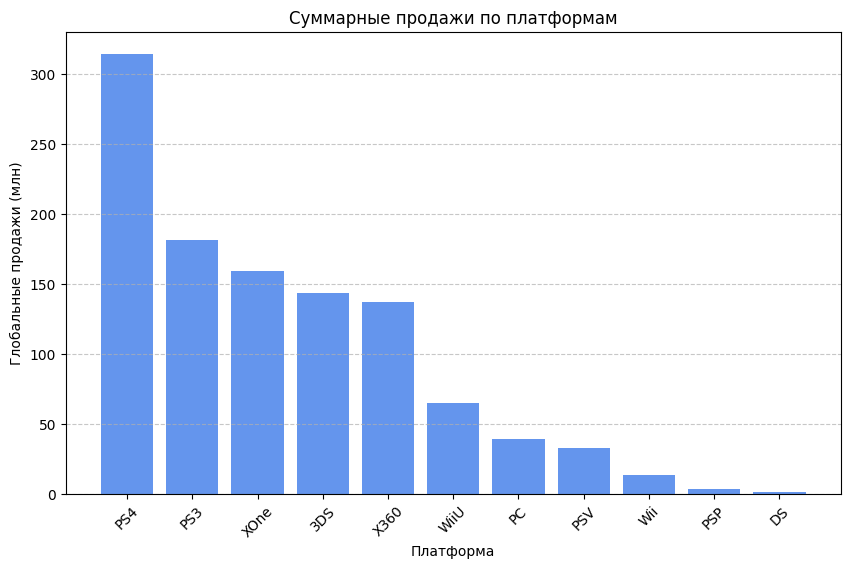

In [45]:
platform_sales_sum = df_filtered_platform.sum().sort_values(ascending=False)

platforms = platform_sales_sum.index
sales = platform_sales_sum.values

plt.figure(figsize=(10, 6))
plt.bar(platforms, sales, color='#6495ED')
plt.title('Суммарные продажи по платформам')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи (млн)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Вывод:**
    По сумарным продажам по платформам значительно лидирует PS4, за ним PS3, XOne, 3DS и X360, примерно в одном диапозоне  от 140 мл копий до 170.

###### Построение диаграммы по глобальным продажам игр по платформам за период с 2013 по 2016

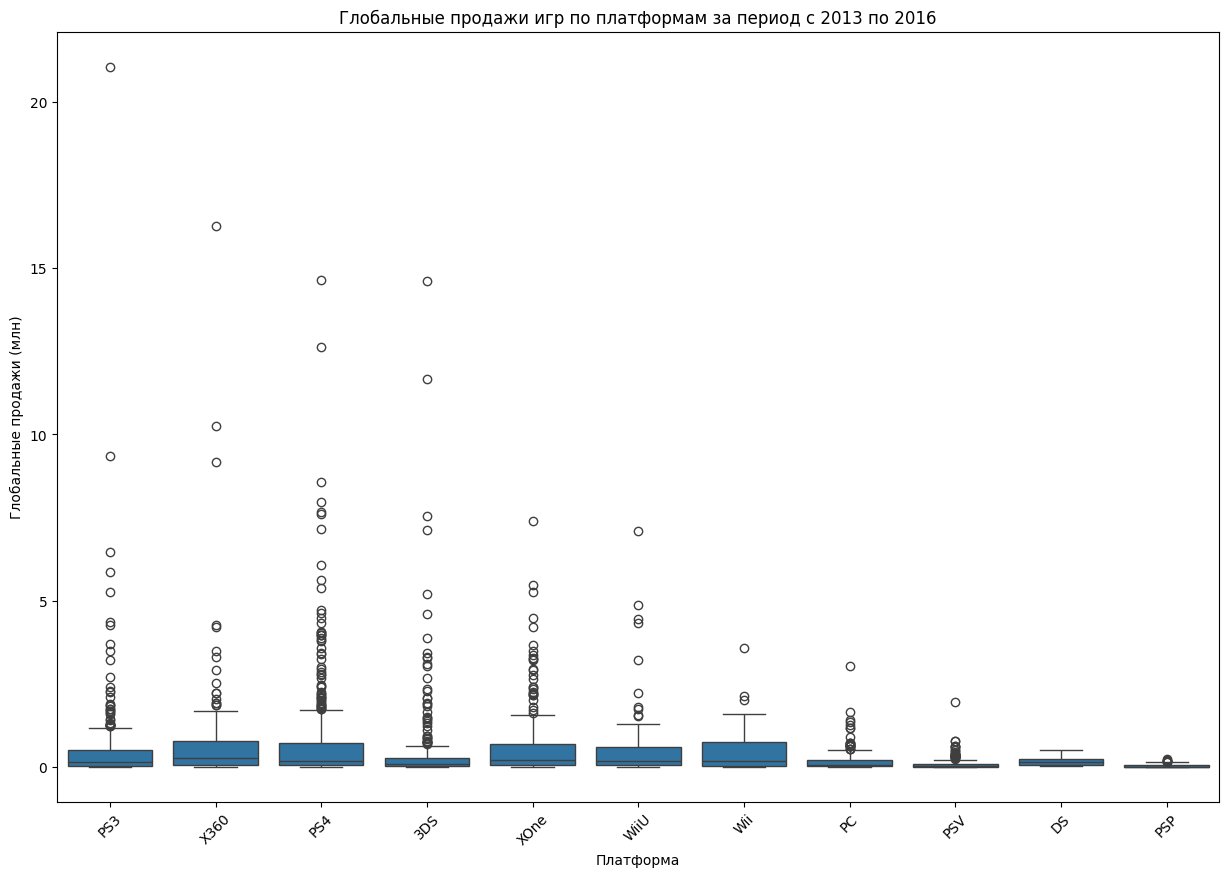

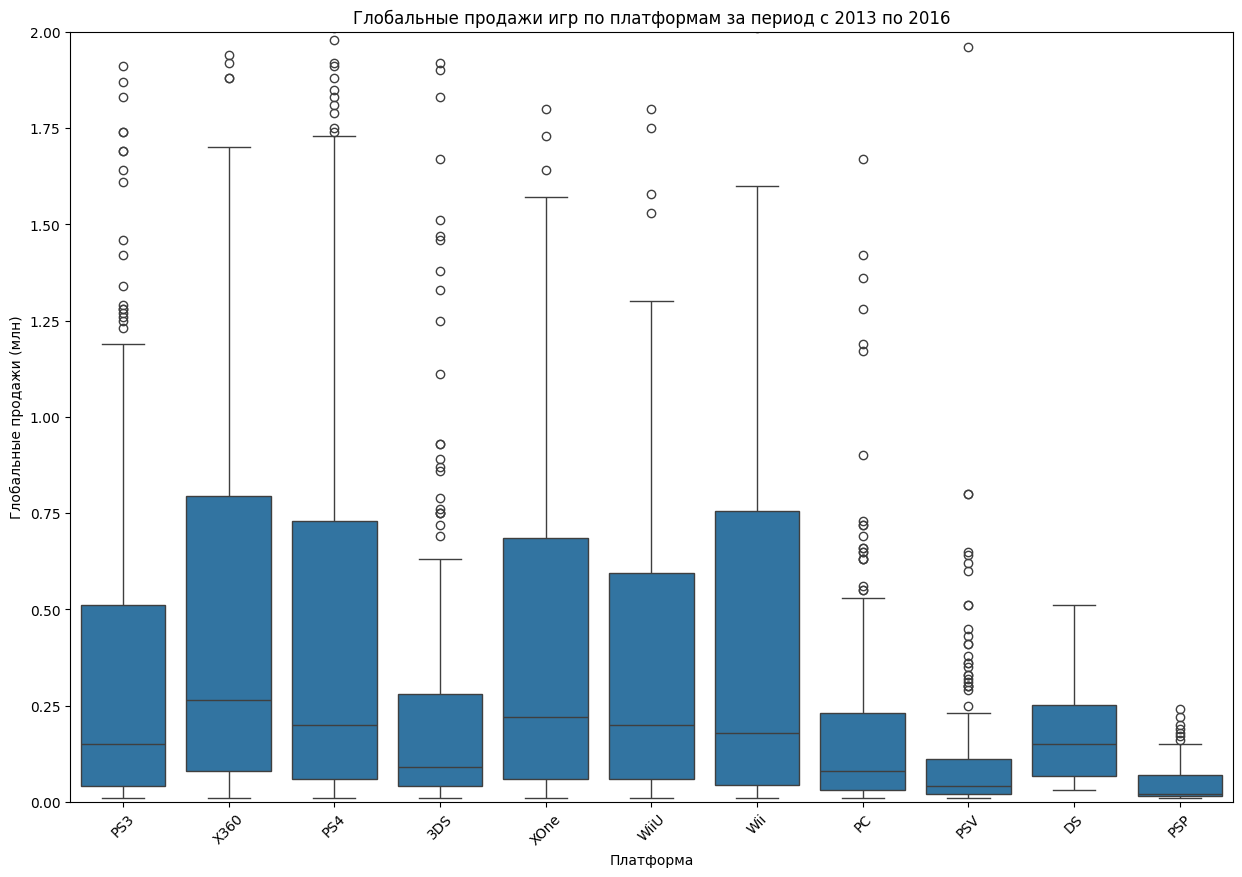

In [46]:
platform_sales_df = df_filtered.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
df_platform_filtered = df_filtered[df_filtered['platform'].isin(platform_sales_df.index.values)]

plt.figure(figsize=(15, 10))
sns.boxplot(x='platform', y='total_sales', data=df_platform_filtered)
plt.title('Глобальные продажи игр по платформам за период с 2013 по 2016')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи (млн)')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(15, 10))
sns.boxplot(x='platform', y='total_sales', data=df_platform_filtered)
plt.title('Глобальные продажи игр по платформам за период с 2013 по 2016')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи (млн)')
plt.xticks(rotation=45)
plt.ylim(0, 2)
plt.show()

In [47]:
df_filtered_platform = df_filtered.groupby('platform')['total_sales']
platform_stats = df_filtered_platform.describe().sort_values(by='count', ascending=False)
platform_stats

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.200,0.7300,14.63
PSV,358.0,0.092151,0.153816,0.01,0.0200,0.040,0.1100,1.96
PS3,345.0,0.525884,1.451939,0.01,0.0400,0.150,0.5100,21.05
3DS,303.0,0.472772,1.381347,0.01,0.0400,0.090,0.2800,14.60
XOne,247.0,0.645020,1.036139,0.01,0.0600,0.220,0.6850,7.39
PC,189.0,0.208624,0.352304,0.01,0.0300,0.080,0.2300,3.05
X360,186.0,0.735484,1.663275,0.01,0.0800,0.265,0.7950,16.27
WiiU,115.0,0.562000,1.038778,0.01,0.0600,0.200,0.5950,7.09
PSP,67.0,0.052239,0.059768,0.01,0.0150,0.020,0.0700,0.24


**Вывод:**

На основе анализа глобальных продаж игр за период с 2013 по 2016 год можно сделать следующие выводы:

1. PS4 является лидером по объему продаж за данный период. Средние продажи на PS4 значительно превышают другие платформы и составляют приблизительно 0.678 миллиона копий. Это объясняется как успешным выпуском нескольких крупных игр, так и общей популярностью платформы.

2. PSV имеет значительно меньший объем продаж по сравнению с PS4, несмотря на сопоставимое количество выпущенных игр. Средние продажи для этой платформы составляют всего около 0.083 миллиона копий, что говорит о ее низкой популярности среди потребителей или менее успешном релизе игр.

3. XOne имеет схожее распределение данных с PS4, но с меньшими средними продажами, около 0.587 миллиона копий. Тем не менее, стоит отметить, что для платформы XOne было выпущено меньше игр, чем для PS4, при этом объем продаж на них сопоставим.

4. X360, имея в два раза меньше выпущенных игр, имеет медианное значение превышающее PS4. Большая часть продаж расположена выше всех остальных платформ на графике. Также имеется большой разброс данных.

5. DS, несмотря на то, что было выпущено всего 8 игр за данный период, продемонстрировала неплохие результаты продаж, не уступая более популярным платформам PSP и PSV. Средние продажи для DS составляют около 0.177 миллиона копий.

Общий анализ данных и уточненные статистические данные из таблицы подтверждают эти выводы, что указывает на успешность и популярность PS4, а также на недостаточную эффективность PSV и некоторые различия между XOne и X360.

In [48]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     2233 non-null   float64
 9   user_score       2233 non-null   float64
 10  rating           2233 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 226.8+ KB


###### Исследование влияния отзывов на продажи.

###### Корреляция отзывов пользователей и продаж для других 5 платформ

Расчет по Платформе 3DS


,total_sales
user_score,0.241504
total_sales,1.000000


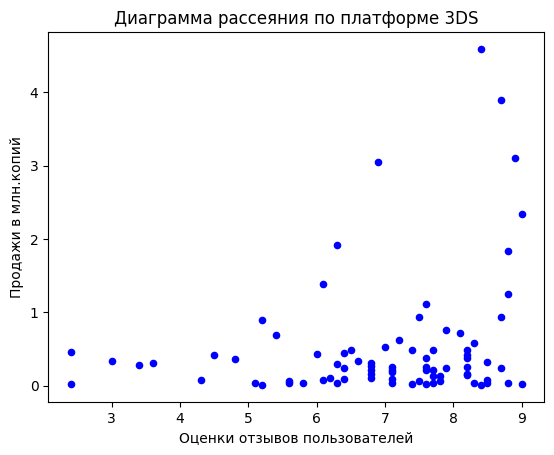

,total_sales
critic_score,0.357057
total_sales,1.000000


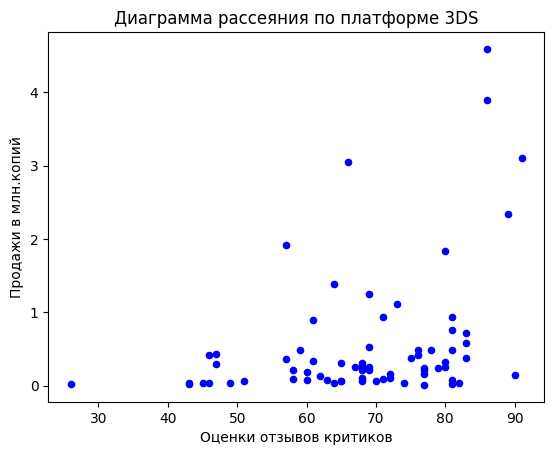

Расчет по Платформе DS
Для платформы DS не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей
Для платформы DS не хватает данных для построения диаграммы и расчета корреляции отзывов критиков
Расчет по Платформе PC


,total_sales
user_score,-0.093842
total_sales,1.000000


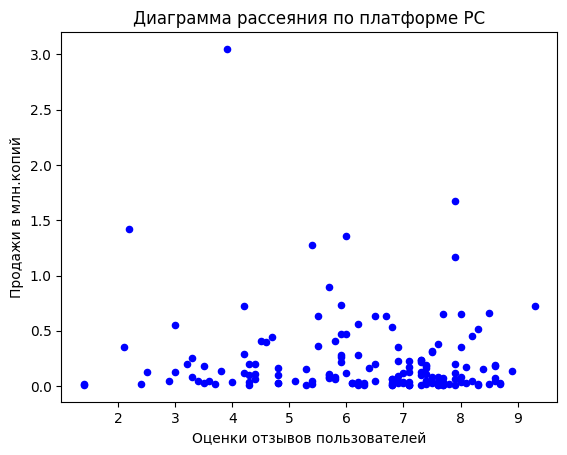

,total_sales
critic_score,0.19603
total_sales,1.00000


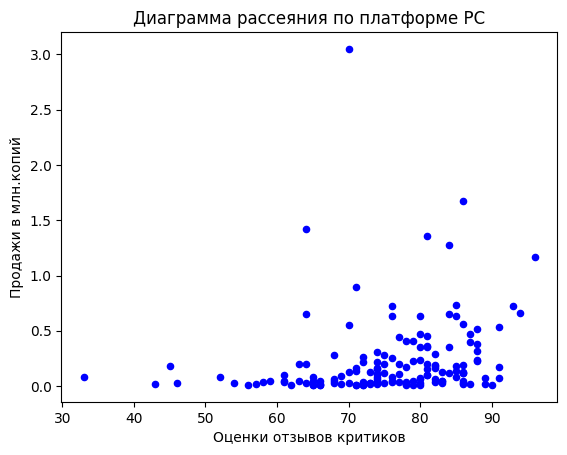

Расчет по Платформе PS3


,total_sales
user_score,0.002394
total_sales,1.000000


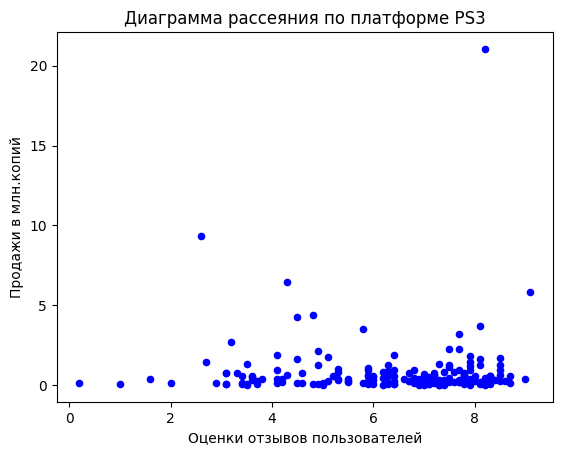

,total_sales
critic_score,0.334285
total_sales,1.000000


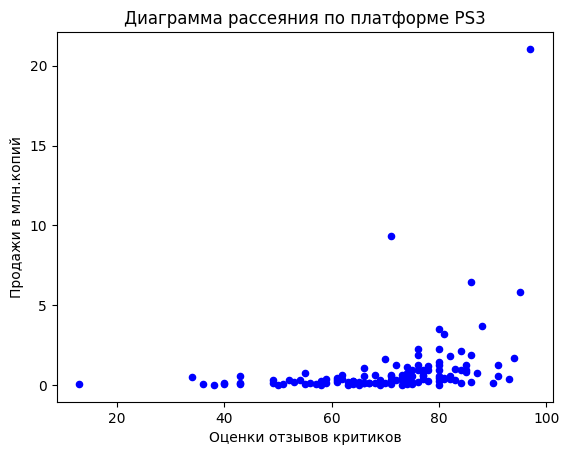

Расчет по Платформе PS4


,total_sales
user_score,-0.031957
total_sales,1.000000


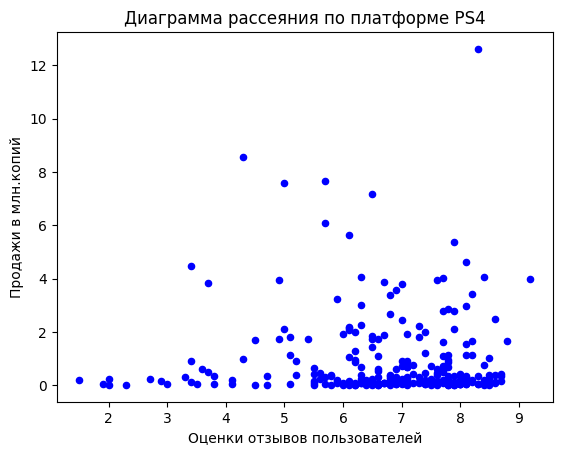

,total_sales
critic_score,0.406568
total_sales,1.000000


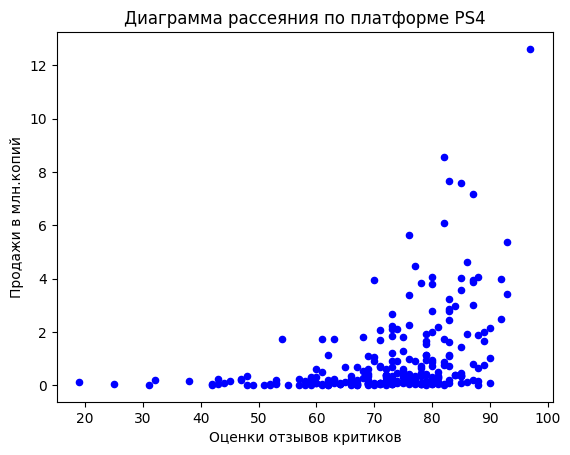

Расчет по Платформе PSP
Для платформы PSP не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей
Для платформы PSP не хватает данных для построения диаграммы и расчета корреляции отзывов критиков
Расчет по Платформе PSV


,total_sales
user_score,0.000942
total_sales,1.000000


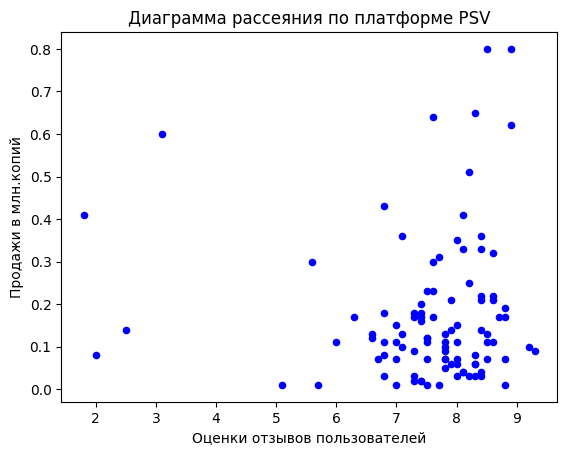

,total_sales
critic_score,0.254742
total_sales,1.000000


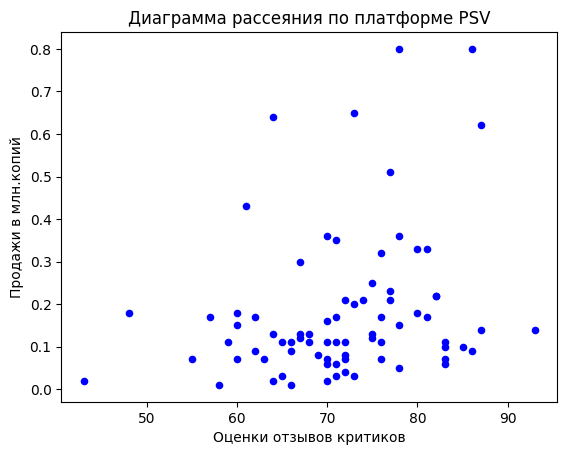

Расчет по Платформе Wii


,total_sales
user_score,0.682942
total_sales,1.000000


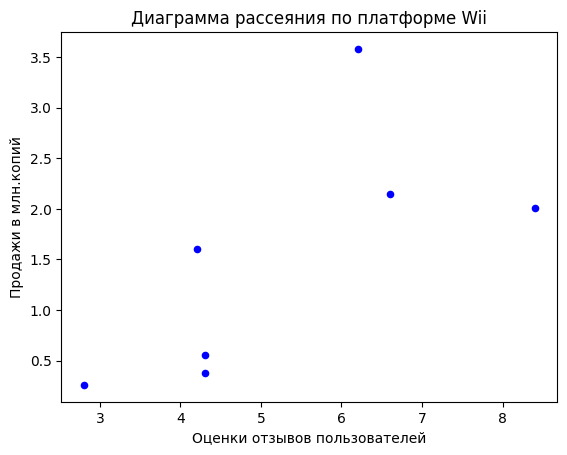

Для платформы Wii не хватает данных для построения диаграммы и расчета корреляции отзывов критиков
Расчет по Платформе WiiU


,total_sales
user_score,0.41933
total_sales,1.00000


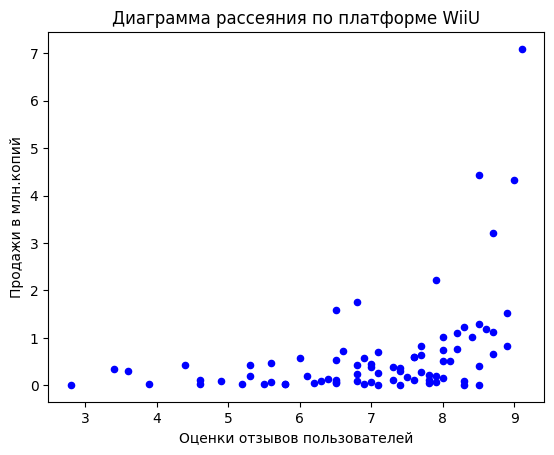

,total_sales
critic_score,0.376415
total_sales,1.000000


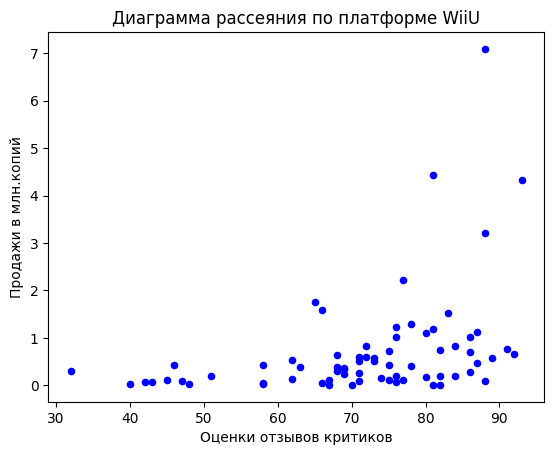

Расчет по Платформе X360


,total_sales
user_score,-0.011742
total_sales,1.000000


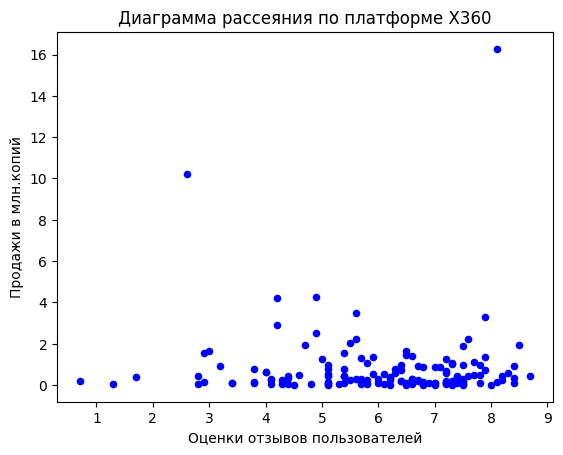

,total_sales
critic_score,0.350345
total_sales,1.000000


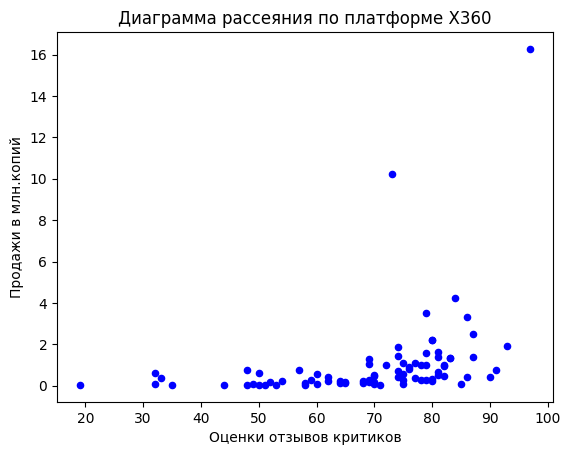

Расчет по Платформе XOne


,total_sales
user_score,-0.068925
total_sales,1.000000


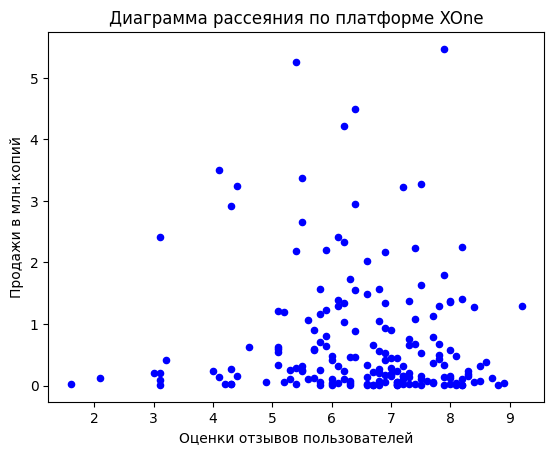

,total_sales
critic_score,0.416998
total_sales,1.000000


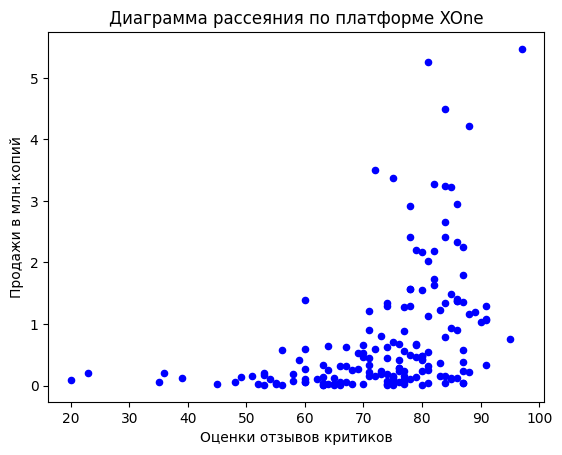

In [52]:
df_sc, y = df_filtered.copy(), 'total_sales'
for platform, games_on_pl in df_sc.groupby('platform'):
    print('='*60)
    print('Расчет по Платформе',platform)
    not_user = len(games_on_pl[(games_on_pl.user_score != 11)&(games_on_pl['user_score'].notna() == True)])
    not_critic = len(games_on_pl[(games_on_pl.critic_score != 101)&(games_on_pl['user_score'].notna() == True)])
    sum_not = 3
    if not_user > sum_not:
        games_on_pl[games_on_pl.user_score != 11].plot(kind='scatter', x='user_score', y=y, color='b')
        display(games_on_pl[games_on_pl.user_score != 11][['user_score', y]].corr()[y])
        plt.xlabel('Оценки отзывов пользователей')
        plt.ylabel('Продажи в млн.копий')
        plt.title('Диаграмма рассеяния по платформе '+platform)
        plt.show()
    else:
        print('Для платформы',platform, 'не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей')
    if not_critic > sum_not:
        games_on_pl[games_on_pl.critic_score != 101].plot(kind='scatter', x='critic_score', y=y, color='b')
        display(games_on_pl[games_on_pl.critic_score != 101][['critic_score', y]].corr()[y])
        plt.xlabel('Оценки отзывов критиков')
        plt.ylabel('Продажи в млн.копий')
        plt.title('Диаграмма рассеяния по платформе '+platform)
        plt.show()
    else:
        print('Для платформы',platform, 'не хватает данных для построения диаграммы и расчета корреляции отзывов критиков')

**Вывод:**

1. Корреляция между отзывами критиков и продажами для платформы ps4 = 0.406, что говорит о незначительной корреляции.
2. Корреляция между отзывами пользователей и продажами для платформы ps4 = -0.031, что говорит об отсутствии корреляции.

Какой либо значимой корреляции обнаружено не было

###### Исследование распределения игр по жанрам

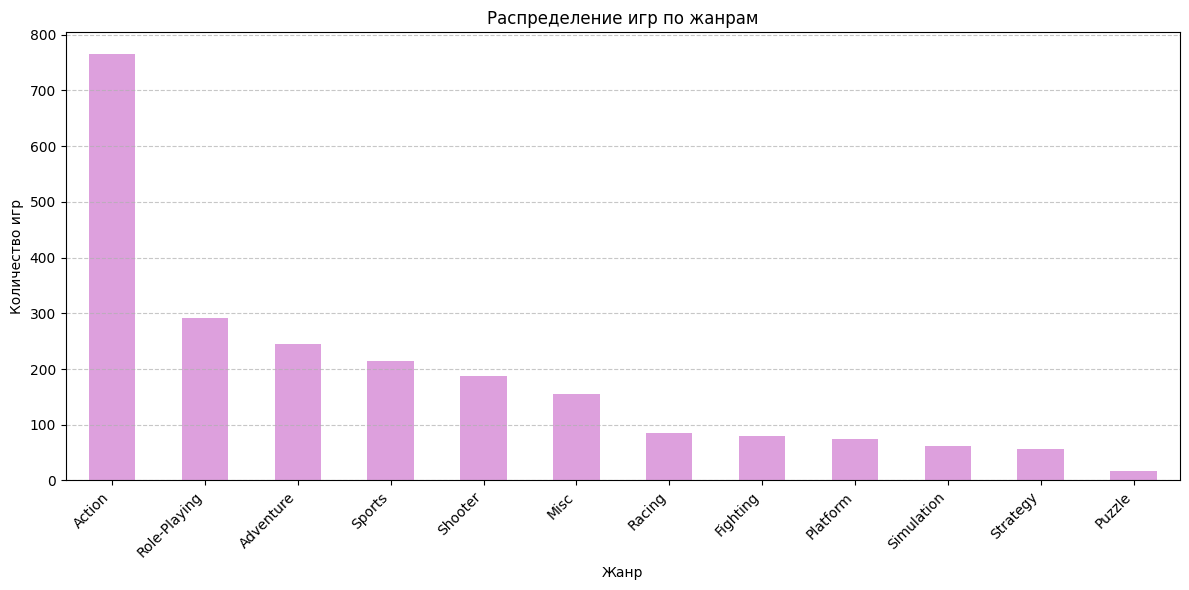

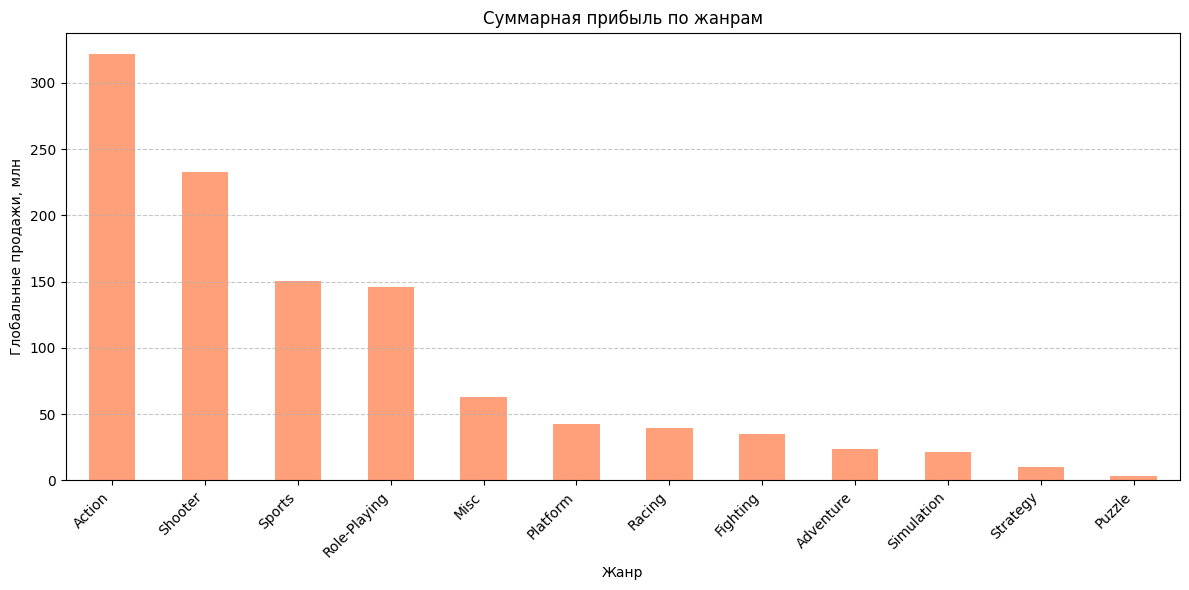

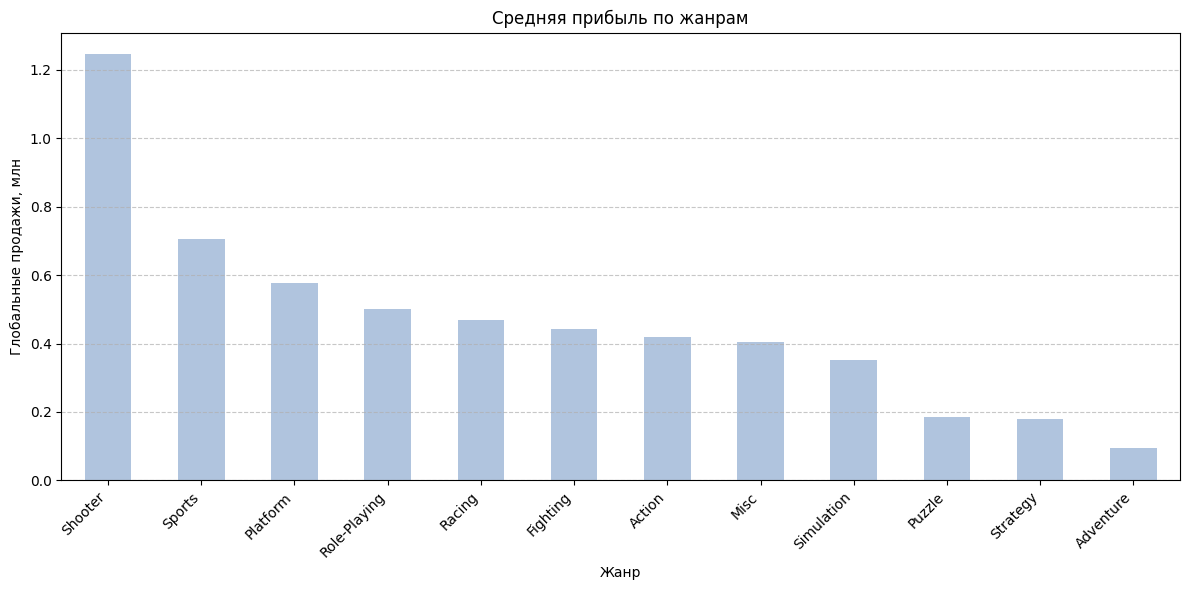

In [53]:
genre_counts = df_filtered['genre'].value_counts()
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='#DDA0DD')
plt.title('Распределение игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество игр')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


genre_sales = df_filtered.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
genre_sales.plot(kind='bar', color='#FFA07A')
plt.title('Cуммарная прибыль по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Глобальные продажи, млн')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

genre_mean = df_filtered.groupby('genre')['total_sales'].mean().sort_values(ascending=False).round(3)
plt.figure(figsize=(12, 6))
genre_mean.plot(kind='bar', color='#B0C4DE')
plt.title('Средняя прибыль по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Глобальные продажи, млн')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [54]:
genre_counts

,count
genre,
Action,766
Role-Playing,292
Adventure,245
Sports,214
Shooter,187
Misc,155
Racing,85
Fighting,80
Platform,74


In [55]:
genre_mean

,total_sales
genre,
Shooter,1.246
Sports,0.704
Platform,0.576
Role-Playing,0.500
Racing,0.469
Fighting,0.441
Action,0.420
Misc,0.405
Simulation,0.351


**Вывод:**
В распределении игр наиболее часто встречаются игры жанра экшен, именно этот жанр имеет самую высокую суммарную прибыль. Это может быть обусловлено тем, что больше всего игр выпущено именно в этом жанре, а также популярностью экшен-игр среди пользователей.
Средняя сумма продаж наибольшая у жанра шутер. Вероятно, это связано с тем, что игры этого жанра, хотя и выпускаются в меньшем количестве и приносят меньшую суммарную прибыль, но каждая игра в среднем продаётся лучше.

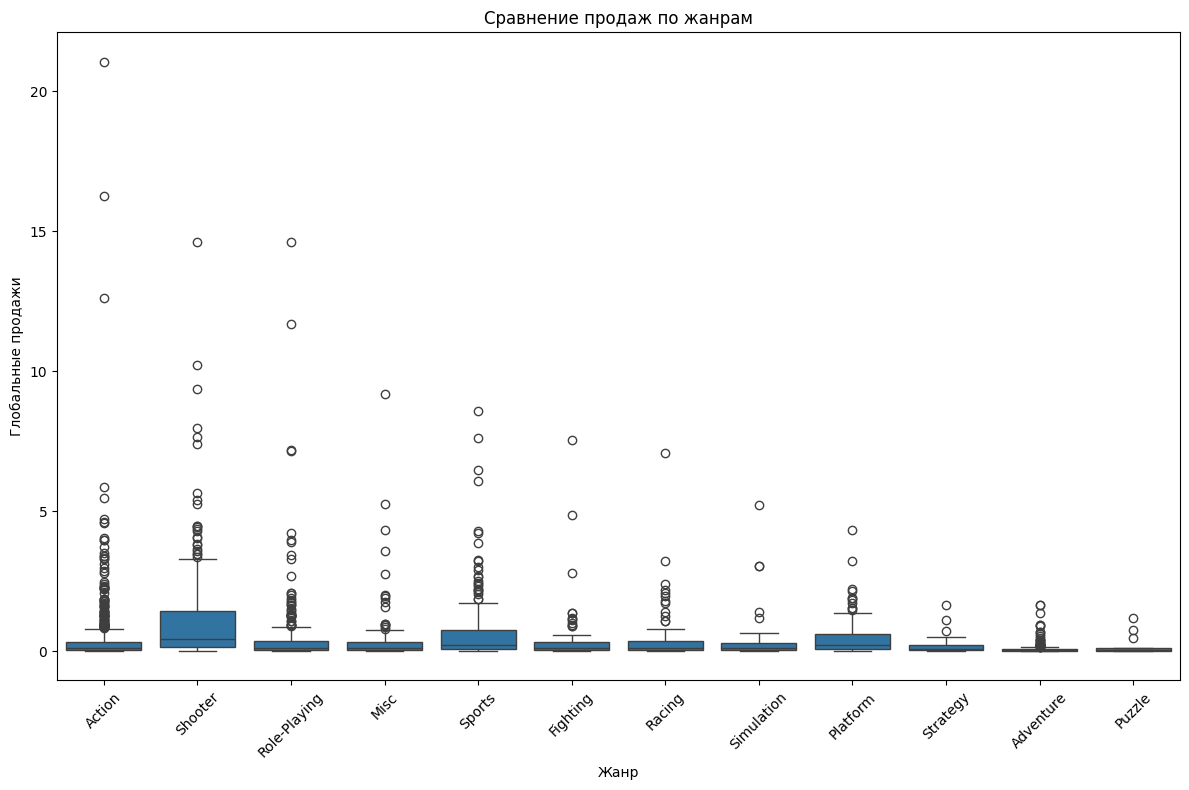

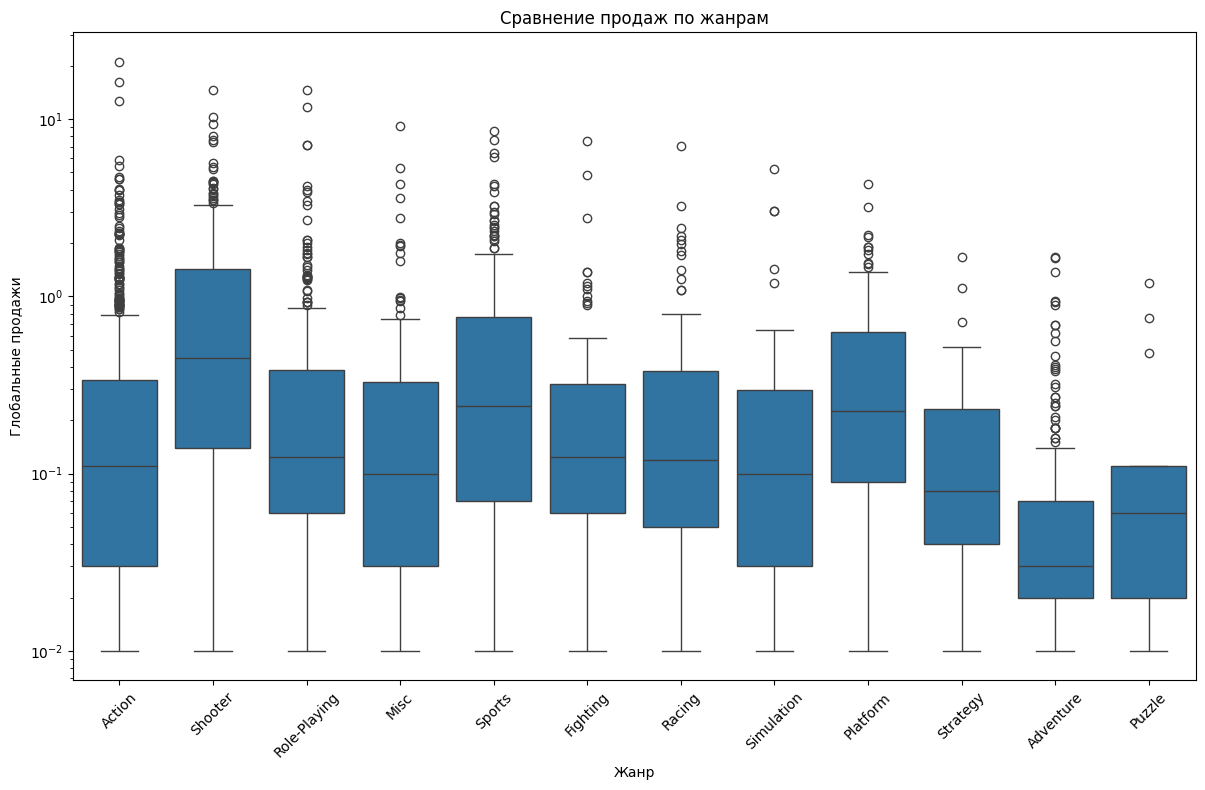

In [56]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='genre', y='total_sales', data=df_filtered)
plt.title('Сравнение продаж по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Глобальные продажи')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='genre', y='total_sales', data=df_filtered)
plt.title('Сравнение продаж по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Глобальные продажи')
plt.xticks(rotation=45)
plt.tight_layout()
plt.yscale('log')
plt.show()

In [57]:
df_filtered_genre = df_filtered.groupby('genre')['total_sales']
platform_stats = df_filtered_genre.describe().sort_values(by='mean', ascending=False)
platform_stats

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Shooter,187.0,1.245882,2.014107,0.01,0.14,0.450,1.4250,14.63
Sports,214.0,0.703972,1.219237,0.01,0.07,0.240,0.7650,8.58
Platform,74.0,0.576081,0.806808,0.01,0.09,0.225,0.6275,4.32
Role-Playing,292.0,0.499623,1.353164,0.01,0.06,0.125,0.3825,14.60
Racing,85.0,0.469294,0.964101,0.01,0.05,0.120,0.3800,7.09
Fighting,80.0,0.441375,1.048883,0.01,0.06,0.125,0.3225,7.55
Action,766.0,0.420196,1.253909,0.01,0.03,0.110,0.3375,21.05
Misc,155.0,0.405290,1.007985,0.01,0.03,0.100,0.3300,9.18
Simulation,62.0,0.350968,0.849163,0.01,0.03,0.100,0.2950,5.22


**Вывод:**
 При анализе диаграммы размаха можно сделать вывод, что самые "стабильные" жанры - Misc и Simulation, а так же Platform и Sports	(среди платформ с наибольшими средними продажами).  Жанр Shooter имеет наибольшие средние продажи, но также сильный размах значений, что говорит о невысокой стабильности. В данном случае стоит обратить внимание на жанр Sports, поскольку, хотя разброс значений превышает Simulation, он также имеет высокие средние продажи и приемлемую среднюю прибыль, а также рынок не перенасыщен этим жанром, в отличие от того же Action. Анализируя данные таблицы наиболее стабильный жанр - Adventure, но продажи игр в этом жанре достаточно низкие.

#### Портрет пользователя для каждого региона

In [58]:
def user_profile(region_data, region):

    top_platforms = region_data.groupby('platform')[region].sum().nlargest(5)
    top_genres = region_data.groupby('genre')[region].sum().nlargest(5)
    total_sales = region_data[region].sum()

    other_platforms_sales = region_data[~region_data['platform'].isin(top_platforms.index)][region].sum()
    top_platforms['Other'] = other_platforms_sales

    other_genres_sales = region_data[~region_data['genre'].isin(top_genres.index)][region].sum()
    top_genres['Other'] = other_genres_sales

    platform_sales_share = ((top_platforms / total_sales) * 100).astype('int')
    genre_sales_share = ((top_genres / total_sales) * 100).astype('int')
    esrb_sales = region_data.groupby('rating')[region].sum()

    print(f"\nКолличество проданых млн копий для каждого типа ESRB в {region}:")
    print(esrb_sales)
    print(f"\nТоп-5 платформ в регионе {region}:")
    print(top_platforms)
    print("\nДоля продаж каждой платформы в процентах:")
    print(platform_sales_share)

    print(f"\nТоп-5 жанров в регионе {region}:")
    print(top_genres)
    print("\nДоля продаж каждого жанра в процентах:")
    print(genre_sales_share)

    plt.figure(figsize=(12, 6))
    plt.style.use(['seaborn-pastel'])
    plt.subplot(1, 2, 1)
    plt.pie(platform_sales_share, labels=platform_sales_share.index, autopct='%1.1f%%', startangle=140)
    plt.title('Доли продаж по платформам')

    plt.subplot(1, 2, 2)
    plt.pie(genre_sales_share, labels=genre_sales_share.index, autopct='%1.1f%%', startangle=140)
    plt.title('Доли продаж по жанрам')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.style.use(['seaborn-pastel'])
    plt.subplot(1, 2, 1)
    plt.pie(top_platforms, labels=top_platforms.index, autopct='%1.1f%%', startangle=140)
    plt.title('Топ-5 платформ в регионе')
    plt.tight_layout()

    plt.subplot(1, 2, 2)
    plt.pie(top_genres, labels=top_genres.index, autopct='%1.1f%%', startangle=140)
    plt.title('Топ-5 жанров в регионе')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.pie(esrb_sales, labels=esrb_sales.index, autopct='%1.1f%%', startangle=140)
    plt.title('Продажи по рейтингу esrb в в регионе')
    plt.tight_layout()
    plt.show()

##### Портрет пользователя для региона Северной Америки


Колличество проданых млн копий для каждого типа ESRB в na_sales:
rating
E              79.05
E10+           54.24
M             165.21
T              49.79
нет оценки     89.42
Name: na_sales, dtype: float64

Топ-5 платформ в регионе na_sales:
platform
PS4      108.74
XOne      93.12
X360      81.66
PS3       63.50
3DS       38.20
Other     52.49
Name: na_sales, dtype: float64

Доля продаж каждой платформы в процентах:
platform
PS4      24
XOne     21
X360     18
PS3      14
3DS       8
Other    11
Name: na_sales, dtype: int64

Топ-5 жанров в регионе na_sales:
genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Other            62.76
Name: na_sales, dtype: float64

Доля продаж каждого жанра в процентах:
genre
Action          28
Shooter         25
Sports          14
Role-Playing    10
Misc             6
Other           14
Name: na_sales, dtype: int64


<ipython-input-58-1c32136862c8>:30: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-pastel'])


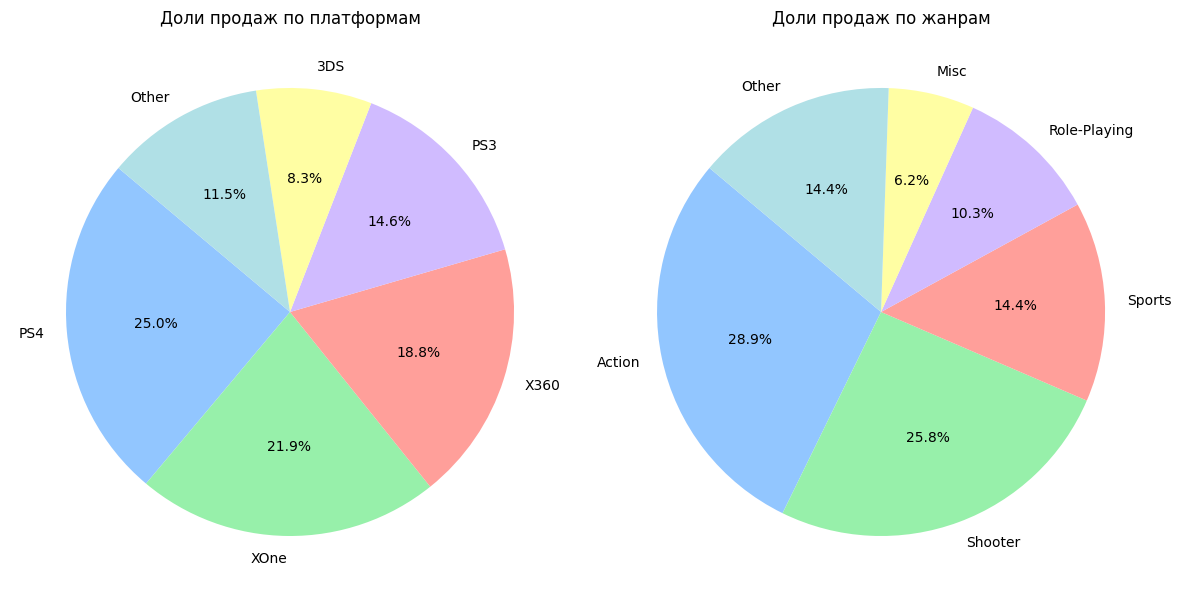

<ipython-input-58-1c32136862c8>:42: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-pastel'])


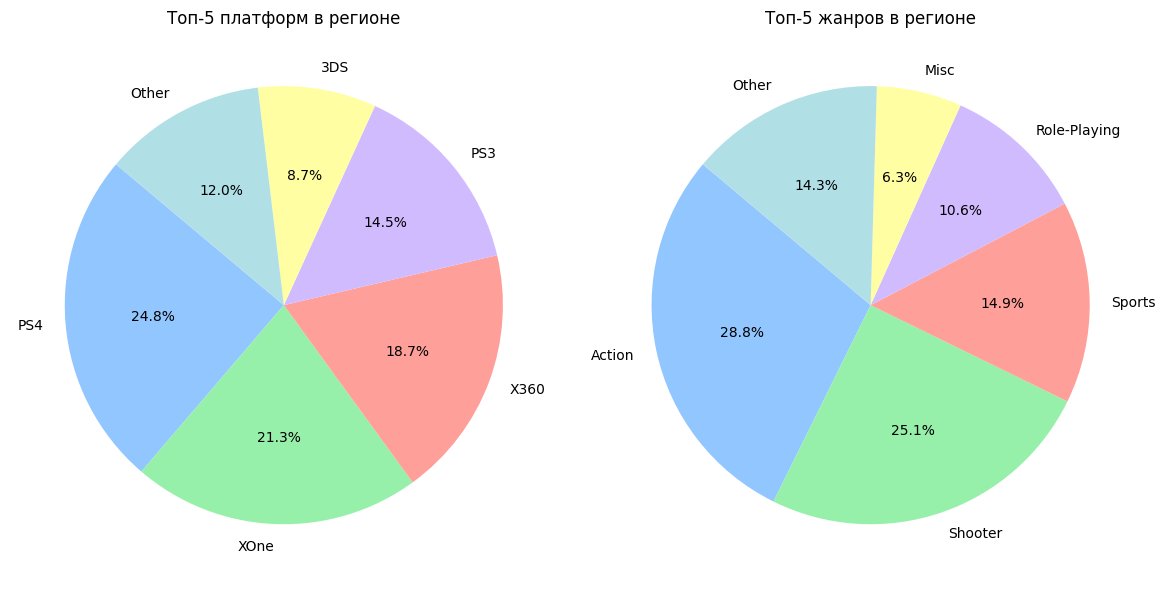

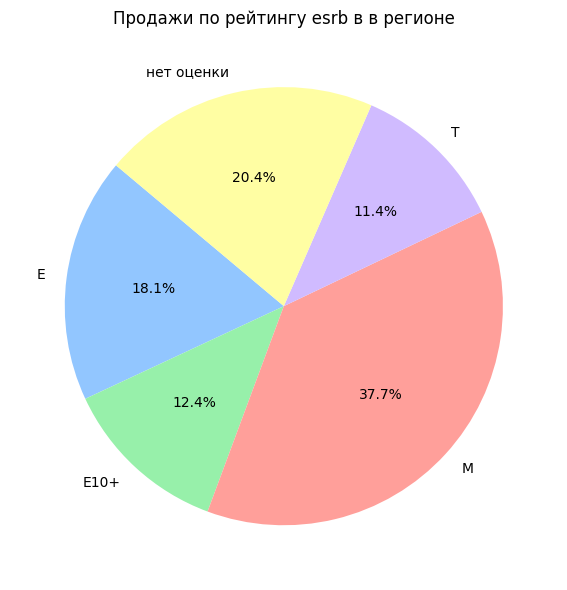

In [59]:
user_profile(df_filtered,'na_sales')

**Вывод:**
На основе этих данных можно сделать вывод, что в Северной Америке наибольшей популярностью пользуются консоли PS4 и Xbox One, а также игры в жанрах Action и Shooter. Влияние рейтинга ESRB также заметно, особенно в случае игр с рейтингом M (Mature), что может быть важным аспектом для разработчиков и издателей при планировании продаж и маркетинговых стратегий в этом регионе.    

##### Портрет пользователя для европейского региона


Колличество проданых млн копий для каждого типа ESRB в eu_sales:
rating
E              83.36
E10+           42.69
M             145.32
T              41.95
нет оценки     78.91
Name: eu_sales, dtype: float64

Топ-5 платформ в регионе eu_sales:
platform
PS4      141.09
PS3       67.81
XOne      51.59
X360      42.52
3DS       30.96
Other     58.26
Name: eu_sales, dtype: float64

Доля продаж каждой платформы в процентах:
platform
PS4      35
PS3      17
XOne     13
X360     10
3DS       7
Other    14
Name: eu_sales, dtype: int64

Топ-5 жанров в регионе eu_sales:
genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Other            68.56
Name: eu_sales, dtype: float64

Доля продаж каждого жанра в процентах:
genre
Action          30
Shooter         22
Sports          15
Role-Playing     9
Racing           5
Other           17
Name: eu_sales, dtype: int64


<ipython-input-58-1c32136862c8>:30: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-pastel'])


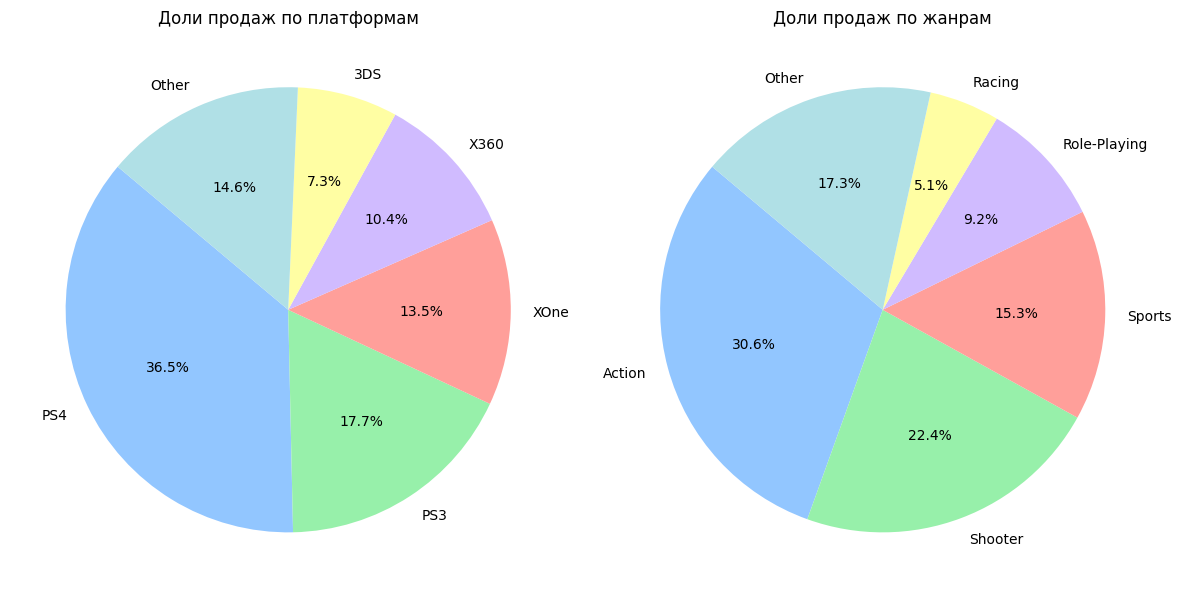

<ipython-input-58-1c32136862c8>:42: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-pastel'])


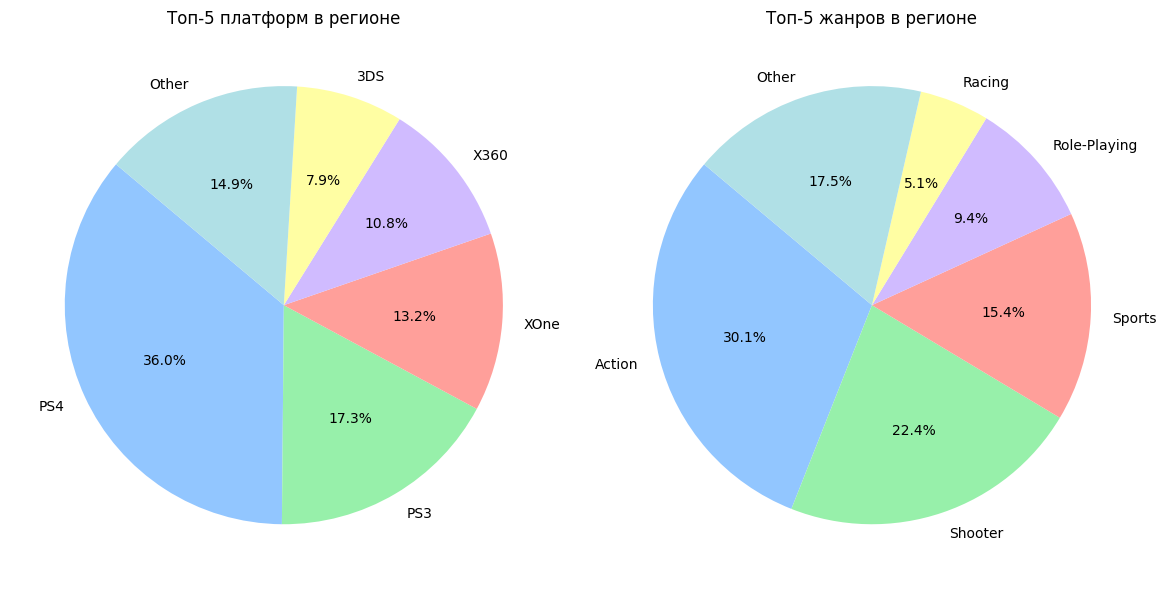

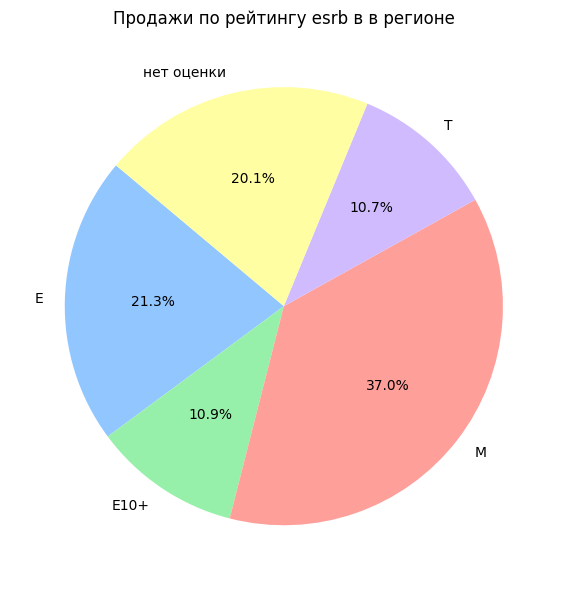

In [60]:
user_profile(df_filtered,'eu_sales')

**Вывод:**
Эти данные позволяют сделать вывод о предпочтениях пользователей в регионе EU. Например, PS4 является наиболее популярной платформой, а экшен-игры наиболее продаваемым жанром. Кроме того, игры с рейтингом M (Mature) проданы больше всего копий в этом регионе, что может указывать на предпочтение более взрослой аудитории.

##### Портрет пользователя для Японии


Колличество проданых млн копий для каждого типа ESRB в jp_sales:
rating
E             15.14
E10+           5.89
M             14.11
T             20.59
нет оценки    85.05
Name: jp_sales, dtype: float64

Топ-5 платформ в регионе jp_sales:
platform
3DS      67.81
PS3      23.35
PSV      18.59
PS4      15.96
WiiU     10.88
Other     4.19
Name: jp_sales, dtype: float64

Доля продаж каждой платформы в процентах:
platform
3DS      48
PS3      16
PSV      13
PS4      11
WiiU      7
Other     2
Name: jp_sales, dtype: int64

Топ-5 жанров в регионе jp_sales:
genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Other           25.79
Name: jp_sales, dtype: float64

Доля продаж каждого жанра в процентах:
genre
Role-Playing    36
Action          28
Misc             6
Fighting         5
Shooter          4
Other           18
Name: jp_sales, dtype: int64


<ipython-input-58-1c32136862c8>:30: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-pastel'])


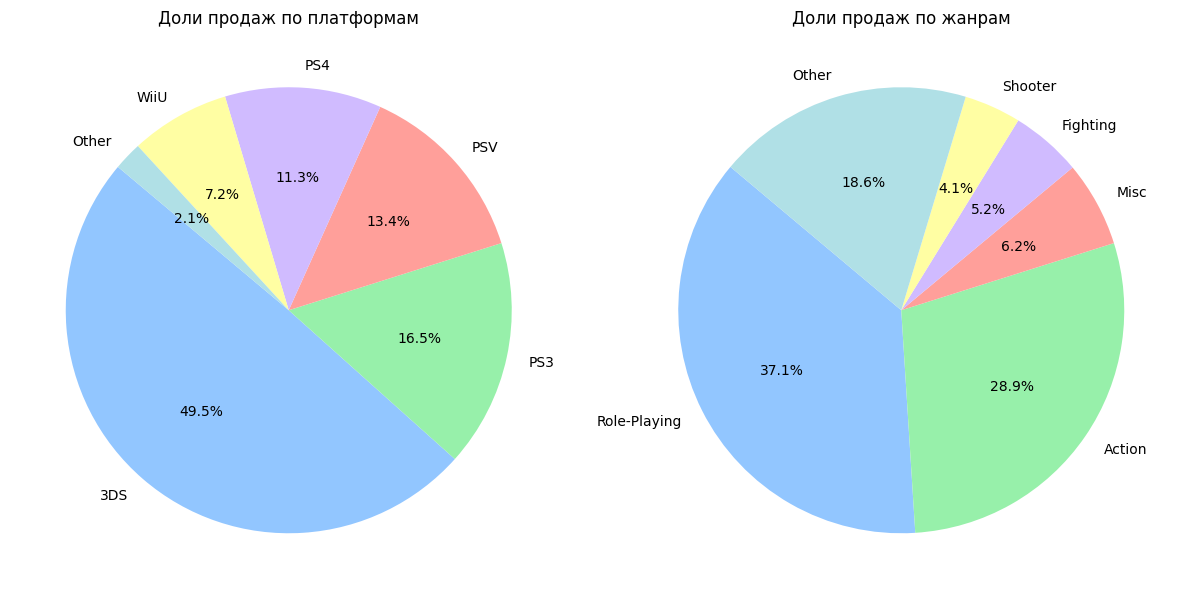

<ipython-input-58-1c32136862c8>:42: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-pastel'])


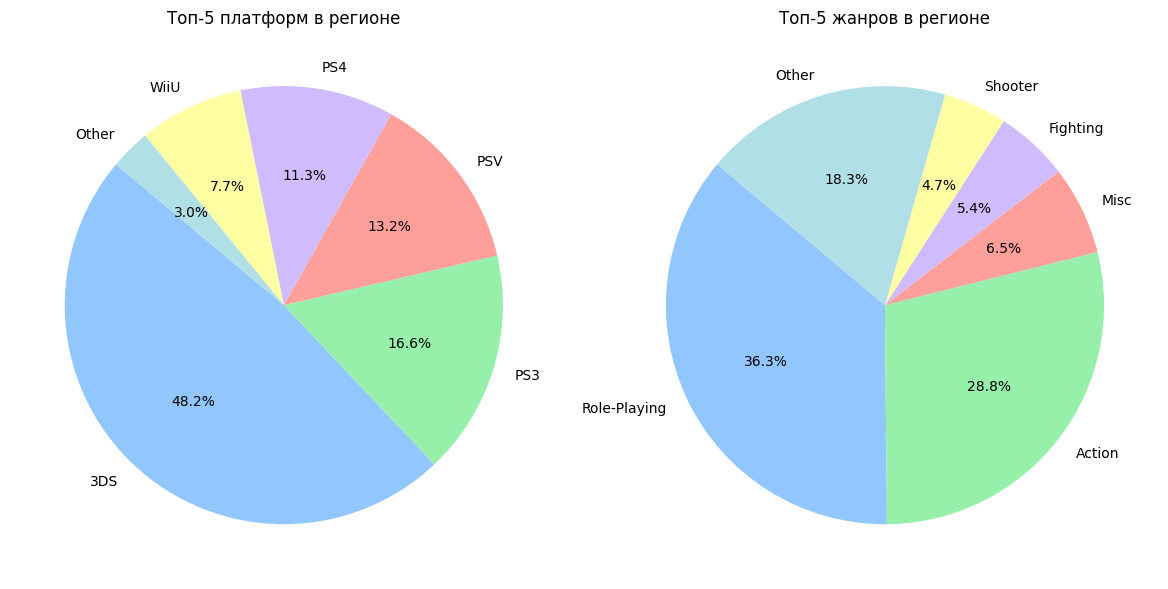

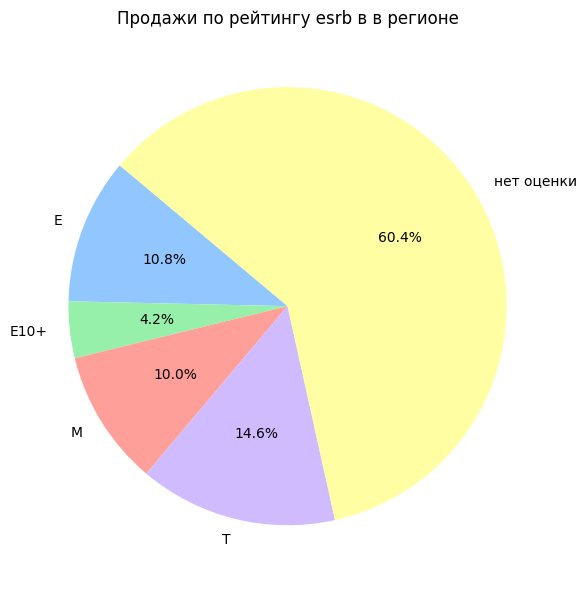

In [61]:
user_profile(df_filtered,'jp_sales')

**Вывод:**
Эти данные позволяют сделать вывод о предпочтениях игроков в регионе JP. Например, Nintendo 3DS является наиболее популярной платформой, а ролевые игры (Role-Playing) наиболее продаваемым жанром. Кроме того, игры без рейтинга ESRB также пользуются значительным спросом в этом регионе.

**Общий вывод**

На основе предоставленных данных для различных регионов можно сделать следующий общий вывод:
В регионе JP (Япония), игроки предпочитают портативные консоли, такие как Nintendo 3DS, и игры в жанре ролевых игр (Role-Playing). Это говорит о значительной популярности RPG-игр среди японских игроков. Кроме того, игры без рейтинга ESRB также пользуются значительным спросом.

В регионе EU (Европа), PS4 является наиболее популярной платформой, а экшен-игры и игры с рейтингом "M" (Mature) продаются лучше всего. Это свидетельствует о предпочтениях европейских игроков в плане игровых платформ и жанров, а также указывает на более широкий интерес к более взрослым и содержательным играм.

В регионе NA (Северная Америка) аналогичные тенденции наблюдаются с PS4, экшен-играми и играми с рейтингом "M" ведущими в продажах. Это подтверждает схожие предпочтения с европейским рынком и подчеркивает влияние глобальных тенденций на игровую индустрию.

Эти данные позволяют глубже понять предпочтения игроков в различных регионах мира и помогают разработчикам и издателям принимать обоснованные решения относительно выпуска и маркетинга игр на различных рынках. Однако стоит отметить, что существует значительное количество игр, не имеющих оценки ESRB. Это может быть связано с тем, что, например, в Японии оценкой возрастного рейтинга занимается организация CERO, и данные этого рейтинга могли не войти в датасет. Кроме того, в данном промежутке времени некоторые игры могли не иметь больших продаж и, следовательно, не были оценены из-за своей новизны или недостаточной известности. Возможно, в данном случае присутствуют свои причины, которые следует учитывать.

#### Проверка гипотез

1. Нулевая гипотеза (H0): Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
1. Альтернативная гипотеза (H1): Средние пользовательские рейтинги платформ Xbox One и PC различаются.

2. Нулевая гипотеза (H0): Средние пользовательские рейтинги жанров Action и Sports одинаковые.
2. Альтернативная гипотеза (H1): Средние пользовательские рейтинги жанров Action и Sports  различаются.
    
- В качестве порогового значения alpha будем использовать стандартное значение 0.05, что соответствует уровню значимости 5%.
- Для проверки гипотез о равенстве средних двух выборок Xbox One и PC, а также жанров Action и Sports применим двухвыборочный t-тест, так как мы сравниваем средние значения двух независимых выборок.


In [62]:
xbox_one_ratings = df_filtered[(df_filtered['user_score'] < 11) & (df_filtered['platform'] == 'XOne')]['user_score']
pc_ratings = df_filtered[(df_filtered['user_score'] < 11) & (df_filtered['platform'] == 'PC')]['user_score']

from scipy.stats import ttest_ind
platform = ttest_ind(xbox_one_ratings, pc_ratings)

print("Результаты теста для средних пользовательских рейтингов платформ Xbox One и PC:")
print("Статистика t =", platform.statistic)
print("p-значение =", platform.pvalue)
print("Среднее значение для пользовательского рейтинга платформы XOne", xbox_one_ratings.mean())
print("Среднее значение для пользовательского рейтинга платформы PC", pc_ratings.mean())

alpha = 0.05

if platform.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC различаются.")
else:
    print("Не удалось отвергнуть нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.")

Результаты теста для средних пользовательских рейтингов платформ Xbox One и PC:
Статистика t = 1.4788255981357277
p-значение = 0.14012658403611647
Среднее значение для пользовательского рейтинга платформы XOne 6.521428571428572
Среднее значение для пользовательского рейтинга платформы PC 6.2696774193548395
Не удалось отвергнуть нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.


In [63]:
xbox_one_ratings.max(), pc_ratings.max()

(9.2, 9.3)

In [64]:
action_ratings = df_filtered[(df_filtered['user_score'] < 11) & (df_filtered['genre'] == 'Action')]['user_score']
sports_ratings = df_filtered[(df_filtered['user_score'] < 11) & (df_filtered['genre'] == 'Sports')]['user_score']

genre = ttest_ind(action_ratings, sports_ratings)
print("\nРезультаты теста для средних пользовательских рейтингов жанров Action и Sports:")
print("Статистика t =", genre.statistic)
print("p-значение =", genre.pvalue)
print("Среднее значение для пользовательского рейтинга жанра Action",action_ratings.mean())
print("Среднее значение для пользовательского рейтинга жанра Sports",sports_ratings.mean())
if genre.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports различаются.")
else:
    print("Не удалось отвергнуть нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports одинаковые.")



Результаты теста для средних пользовательских рейтингов жанров Action и Sports:
Статистика t = 11.535100577928208
p-значение = 1.0517832389140023e-27
Среднее значение для пользовательского рейтинга жанра Action 6.837532133676092
Среднее значение для пользовательского рейтинга жанра Sports 5.238124999999999
Отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports различаются.


In [65]:
df_filtered_ratings = df_filtered[df_filtered['user_score'] < 11]

genre_user_ratings = df_filtered_ratings.pivot_table(
    index='genre', values='user_score', aggfunc='mean').sort_values(by='user_score', ascending=False)
platform_user_ratings = df_filtered_ratings.pivot_table(
    index='platform', values='user_score', aggfunc='mean').sort_values(by='user_score', ascending=False)

print("Средние пользовательские рейтинги по жанрам:")
print(genre_user_ratings)

print("\nСредние пользовательские рейтинги по платформам:")
print(platform_user_ratings)

Средние пользовательские рейтинги по жанрам:
              user_score
genre                   
Puzzle          7.471429
Adventure       7.461667
Role-Playing    7.376471
Fighting        7.037500
Misc            6.975000
Action          6.837532
Platform        6.713793
Shooter         6.342308
Strategy        6.183333
Racing          6.080000
Simulation      6.054839
Sports          5.238125

Средние пользовательские рейтинги по платформам:
          user_score
platform            
PSV         7.527273
WiiU        7.017500
3DS         6.976250
PS4         6.748249
XOne        6.521429
PS3         6.348387
PC          6.269677
X360        5.993007
PSP         5.850000
Wii         5.257143
DS          4.800000


**Вывод**
В результате проведенных тестов делаем следующие выводы:

1. Для сравнения средних пользовательских рейтингов платформ Xbox One и PC полученное p-значение (0.1401) больше уровня значимости alpha (0.05), что говорит о том, что нет достаточных доказательств для отвержения нулевой гипотезы. Следовательно,  нельзя утверждать, что средние пользовательские рейтинги платформ Xbox One и PC различаются.


2. Для сравнения средних пользовательских рейтингов жанров Action и Sports полученное p-значение (практически ноль) значительно меньше уровня значимости alpha, что говорит о том, что есть достаточные доказательства для отвержения нулевой гипотезы. Следовательно, нельзя утверждать, что средние пользовательские рейтинги жанров Action и Sports различаются.

#### Oбщий вывод
1. Предобработка данных.

   Предобработка данных включала обработку пропусков. Явных дубликатов в данных не обнаружено. Неявные дубликаты были обработаны.
     
2. Исследовательский анализ данных.

   - Количество выпущенных игр по годам.
   
   Наибольшее количество игр было выпущено в 2008 и 2009 годах, после чего наблюдался спад с 2010 по 2013 год, возможно связанный с мировым экономическим кризисом.
   
   С 1980 по 1993 год количество выпущенных игр в год не превышало 50, что, вероятно, связано с молодостью игровой индустрии и ограниченными техническими возможностями того времени. Важно отметить, что информация за 2016 год считается не полной, что может влиять на общее представление о тенденциях в индустрии в последние годы.
   
   - Распределение продаж по годам для платформ с наибольшими сумарными продажами
   
    На протяжении периода с 1980 по 2016 год наибольшую прибыль среди платформ получили PS2, X360, Wii, PS3 и DS. PS2 является лидером с самой высокой прибылью.
    
    X360 лидирует в продажах с 2005 по 2015 год, что может указывать на его успешность по сравнению с PS2. Обычно после запуска платформы наблюдается рост продаж, за которым следует спад.
    
    Средний срок "жизни" платформы составляет около 7 лет.С 1990 по 2000 годы было выпущено больше всего платформ, проживших менее 4х лет. Однако с 2000 года 'жизнь' платформ значительно увеличилась по сравнению с периодом с 1985 по 2000 год.
    
    За один год обычно не появляется более трех новых платформ. Новая платформа появляется примерно каждые 2-3 года.
    
    
3. Исследование данных за актуальный период. В данном исследование актуальный период с 2013 по 2016 год. Средний срок жизни платформы в период с 2013 по 2016 примерно равен трем годам.

    За период с 2013 по 2016 год PS4 выделяется лидером по объему продаж. Средние продажи на этой платформе составляют около 0.678 миллиона копий, превышая другие платформы.
    
   X360, хотя имеет меньшее количество выпущенных игр, демонстрирует медианное значение продаж, превышающее PS4. Несмотря на небольшое количество выпущенных игр, DS также показывает неплохие результаты продаж.
        
    - Лидирующие платформы.
   По сумарным продажам по платформам значительно лидирует PS4, за ним PS3, XOne, 3DS и X360, примерно в одном диапозоне от 140 мл копий до 170.
    
    - Исследование влияния отзывов на продажи.
    Корреляция между отзывами критиков и продажами для платформы ps4 = 0.4052, что говорит о низкой корреляции. Корреляция между отзывами пользователей и продажами для платформы ps4 = -0.0329, что говорит об отсутствии корреляции.
    
    - Исследование распределения игр по жанрам.
    Наиболее часто встречаются игры жанра экшен, так же имеет самую высокую суммарную прибыль. Средняя сумма продаж наибольшая у жанра шутер.
    
    
4. Портрет пользователя

   - В регионе JP (Япония), игроки предпочитают портативные консоли, такие как Nintendo 3DS, и игры в жанре ролевых игр (Role-Playing). Это говорит о значительной популярности RPG-игр среди японских игроков.
   - В регионе EU (Европа), PS4 является наиболее популярной платформой, а экшен-игры и игры с рейтингом "M" (Mature) продаются лучше всего. Это свидетельствует о предпочтениях европейских игроков в плане игровых платформ и жанров, а также указывает на более широкий интерес к более взрослым и содержательным играм.
   - В регионе NA (Северная Америка) аналогичные тенденции наблюдаются с PS4, экшен-играми и играми с рейтингом "M" ведущими в продажах. Это подтверждает схожие предпочтения с европейским рынком и подчеркивает влияние глобальных тенденций на игровую индустрию.
        Эти данные позволяют глубже понять предпочтения игроков в различных регионах мира и помогают разработчикам и издателям принимать обоснованные решения относительно выпуска и маркетинга игр на различных рынках.
        

5. Проверка гипотез
   
   - Не удалось отвергнуть нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

   - Отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports различаются.
   
    Эти результаты указывают на то, что, с вероятностью, допустимой для выбранного уровня значимости, нет оснований полагать, что пользовательские рейтинги платформ Xbox One и PC, различаются. Но так же результаты  указывают на то, что, с вероятностью, допустимой для выбранного уровня значимости, есть основания полагать, что пользовательские рейтинги пжанров Action и Sports различаются.
При выборе платформы для продвижения следует обратить внимание на регион. Для европейского рынка и Северной Америки наиболее перспективной платформой является PS4, в то время как для Японии предпочтительнее выбрать 3DS. Отзывы пользователей и критиков не оказывают значительного влияния на объемы продаж, поэтому важно сконцентрироваться на других факторах.

Среди жанров следует обратить внимание на Action, Sports, Platform и Shooter, так как они имеют высокий потенциал продаж для европейского рынка и Северной Америки. Но для Японского рынка стоит выбрать Role-Playing и Action

Важно отметить, что наиболее успешные игры для европейского и североамериканского рынков чаще всего имеют рейтинг ESRB - M (подходит для лиц старше 17 лет). Однако для Японии возможности выделить определенный возрастной рейтинг ограничены из-за недостатка данных в текущем датафрейме.

Эти результаты могут помочь бизнесу принимать обоснованные решения о стратегии выбора успешных игр и проведении маркетинговых кампаний для привлечения новых клиентов и удержания текущей аудитории.